<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#csv read file
sat_path='./sat_scores.csv'
with open(sat_path, "r") as f:
    reader=[row.split(',') for row in f.read().splitlines()]
f.close()
dict_sat={}
row_first=0
row_last=len(reader)

for key in reader[0]:
    temp=[]
    ind=reader[0].index(key)
    for row in range(1,row_last):
        temp.append(reader[row][ind])
    dict_sat[key]=temp
pprint.pprint(dict_sat,width=400)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'],
 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS',

In [3]:
#Panda
dict_key=[]
dict_sat2={}
df_sat=pd.read_csv(sat_path)
dict_key=df_sat.columns.values

for key in dict_key:
    dict_sat2[key]=list(df_sat[key])
    
pprint.pprint(dict_sat,width=400)



{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'],
 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
df_sat_from_dict=pd.DataFrame(dict_sat)
df_sat_from_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [5]:
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

# A: Load from dictionary give us the dataframe with string data type only. However, if we use read_csv, the coresponding data type will be automatically considered in loading csv data

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
df_sat.head(10).describe()

,Rate,Verbal,Math
count,10.000000,10.000000,10.000000
mean,73.900000,506.200000,506.400000
std,5.321863,7.465476,6.703233
min,68.000000,495.000000,499.000000
25%,69.500000,500.250000,500.250000
50%,71.500000,507.500000,505.500000
75%,78.500000,510.750000,512.250000
max,82.000000,520.000000,516.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
#name of col
#type of col
#Explanation of col
#shape of dataset

sat_data_dict={
    'State':{
                'Type': 'String',
                'Description': 'State Name',
            },
    'Rate':{
                'Type': 'Integer',
                'Description': 'Paticipation Rate of Corresponding State',
            },
    'Verbal':{
                'Type': 'Integer',
                'Description': 'Average Verbal Score',
            },
    'Math':{
                'Type': 'Integer',
                'Description': 'Average Math Score',
            },
    'Shape':df_sat.shape
}

pprint.pprint(sat_data_dict,width=200)

{'Math': {'Description': 'Average Math Score', 'Type': 'Integer'},
 'Rate': {'Description': 'Paticipation Rate of Corresponding State', 'Type': 'Integer'},
 'Shape': (52, 4),
 'State': {'Description': 'State Name', 'Type': 'String'},
 'Verbal': {'Description': 'Average Verbal Score', 'Type': 'Integer'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [8]:
rate_step=int(round((df_sat['Rate'].max()-df_sat['Rate'].min())/20))
rate_start=df_sat['Rate'].min()-rate_step
rate_end=df_sat['Rate'].max()+rate_step


C:\Users\wang_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


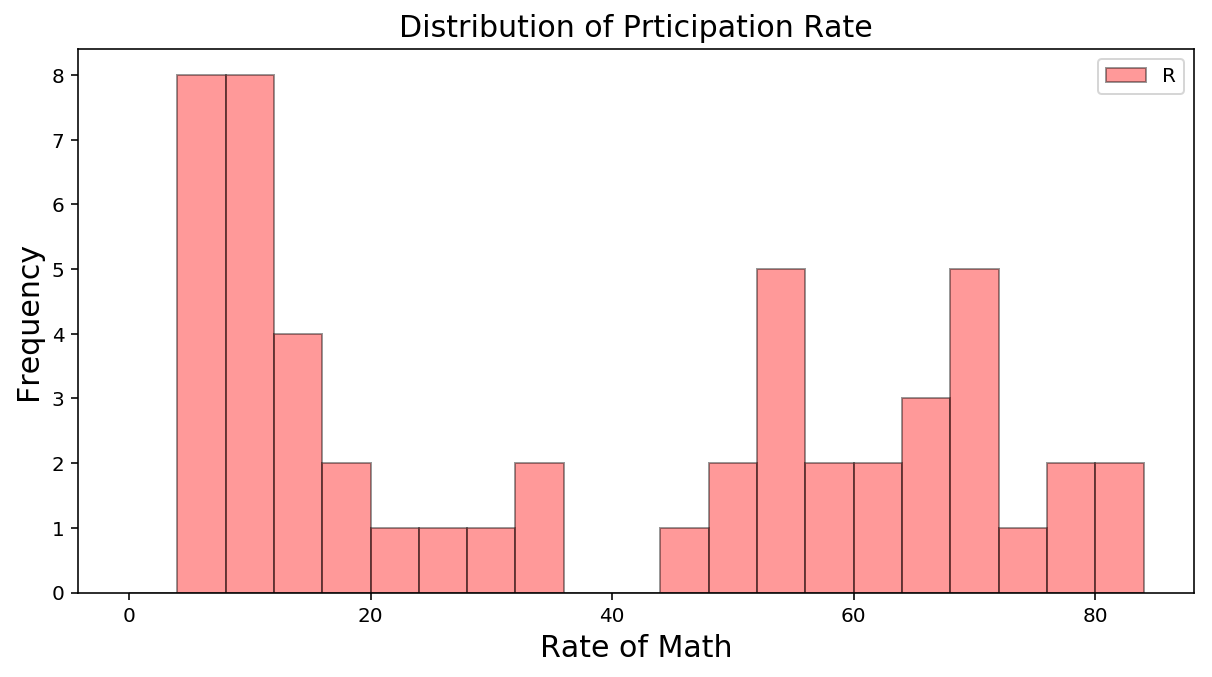

In [9]:
plt.figure(figsize=(10,5))
ax_rate = sns.distplot(df_sat['Rate'],color='r',kde=False,bins=range(rate_start,rate_end,rate_step),axlabel='Distribution of Rate',hist_kws=dict(edgecolor="black", linewidth=1))
ax_rate.set_xlabel('Rate of Math',fontsize=15)
ax_rate.set_ylabel('Frequency',fontsize=15)
ax_rate.set_title('Distribution of Prticipation Rate',fontsize=15)
ax_rate.legend("R")

In [10]:
math_step=int(round((df_sat['Math'].max()-df_sat['Math'].min())/20))
math_start=df_sat['Math'].min()-math_step
math_end=df_sat['Math'].max()+math_step


C:\Users\wang_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


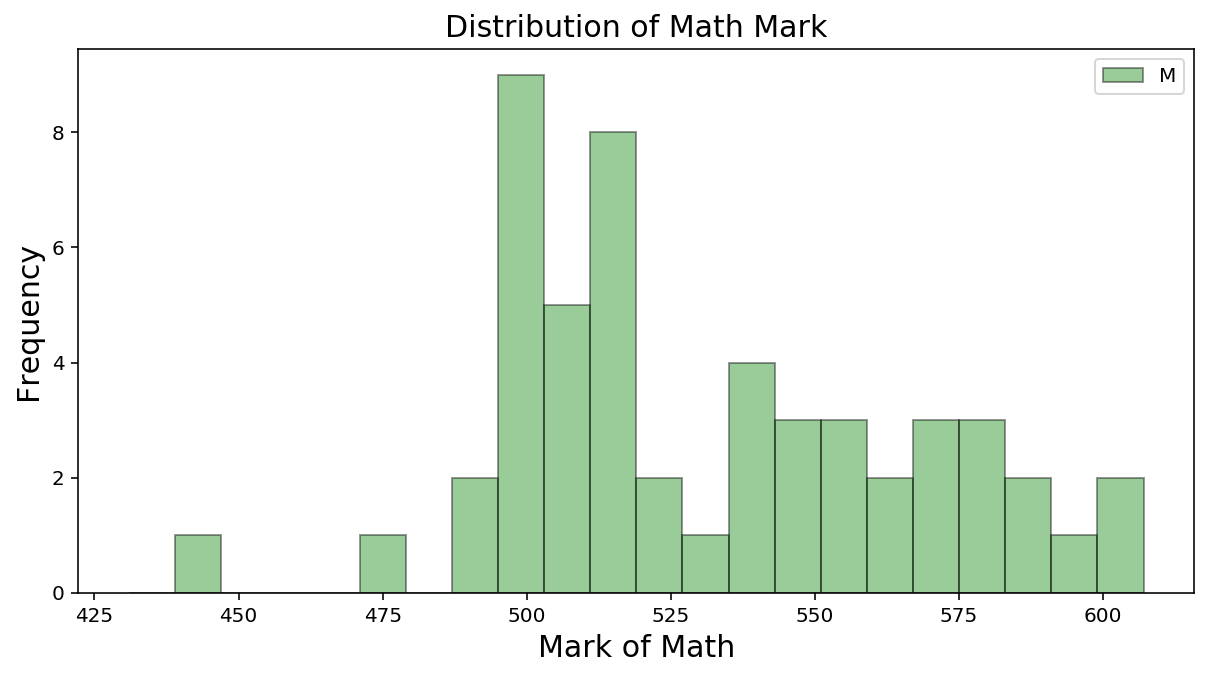

In [11]:
plt.figure(figsize=(10,5))
ax_math = sns.distplot(df_sat['Math'],color='g',kde=False,bins=range(math_start,math_end,math_step),axlabel='Distribution of Math',hist_kws=dict(edgecolor="black", linewidth=1))
ax_math.set_xlabel('Mark of Math',fontsize=15)
ax_math.set_ylabel('Frequency',fontsize=15)
ax_math.set_title('Distribution of Math Mark',fontsize=15)
ax_math.legend("M")

In [12]:
verbal_step=int(round((df_sat['Verbal'].max()-df_sat['Verbal'].min())/20))
verbal_start=df_sat['Verbal'].min()-verbal_step
verbal_end=df_sat['Verbal'].max()+verbal_step

C:\Users\wang_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


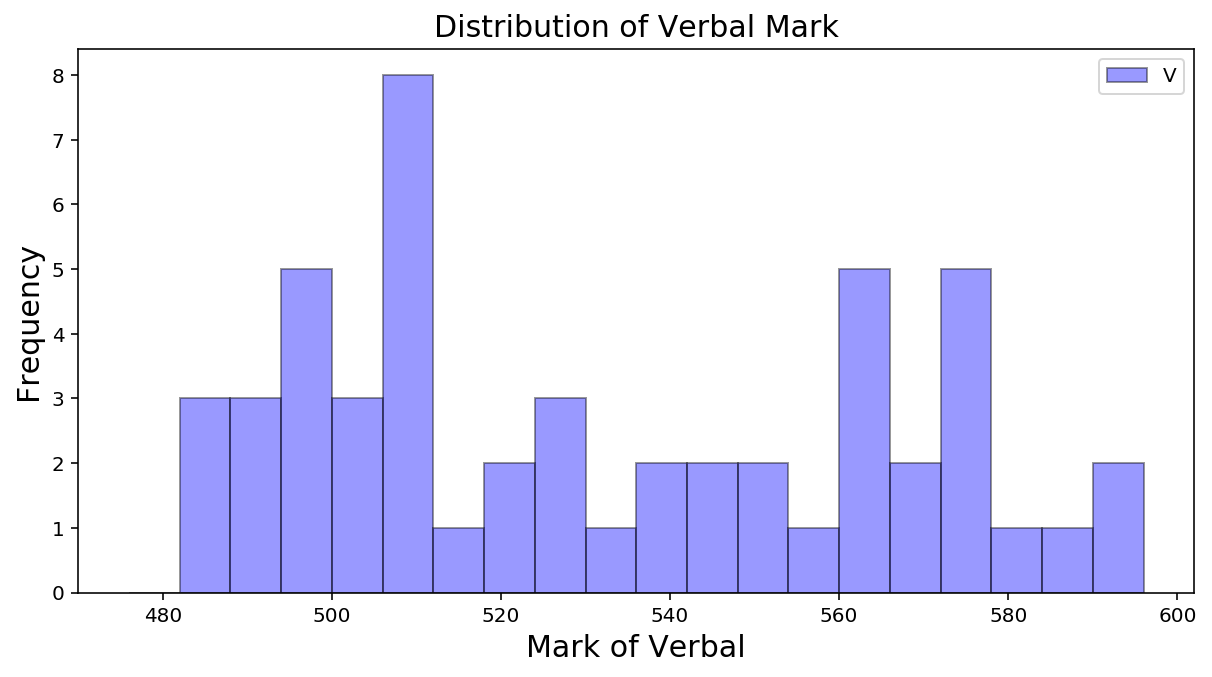

In [13]:
plt.figure(figsize=(10,5))
ax_verbal = sns.distplot(df_sat['Verbal'],color='b',kde=False,bins=range(verbal_start,verbal_end,verbal_step),hist_kws=dict(edgecolor="black", linewidth=1))
ax_verbal.set_xlabel('Mark of Verbal',fontsize=15)
ax_verbal.set_ylabel('Frequency',fontsize=15)
ax_verbal.set_title('Distribution of Verbal Mark',fontsize=15)
ax_verbal.legend("V")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

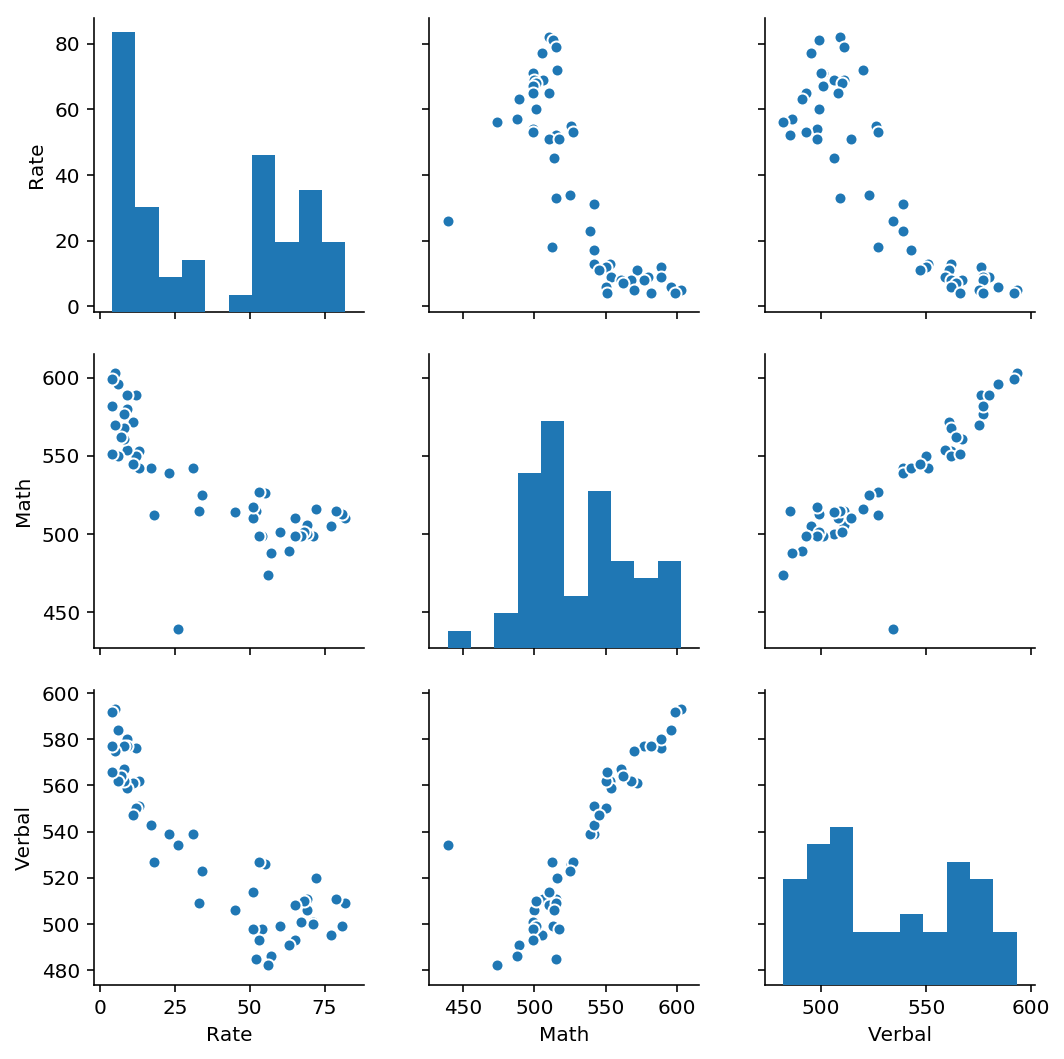

In [14]:
sns.pairplot(df_sat[['Rate','Math','Verbal']])

# ANS: AVG SAT Math score is proportional to AVG Verbal score, lower participation rate points to higher AVG Math and Verbal score which may due to exceptions.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,'Distribution of Verbal and Math Stacked')

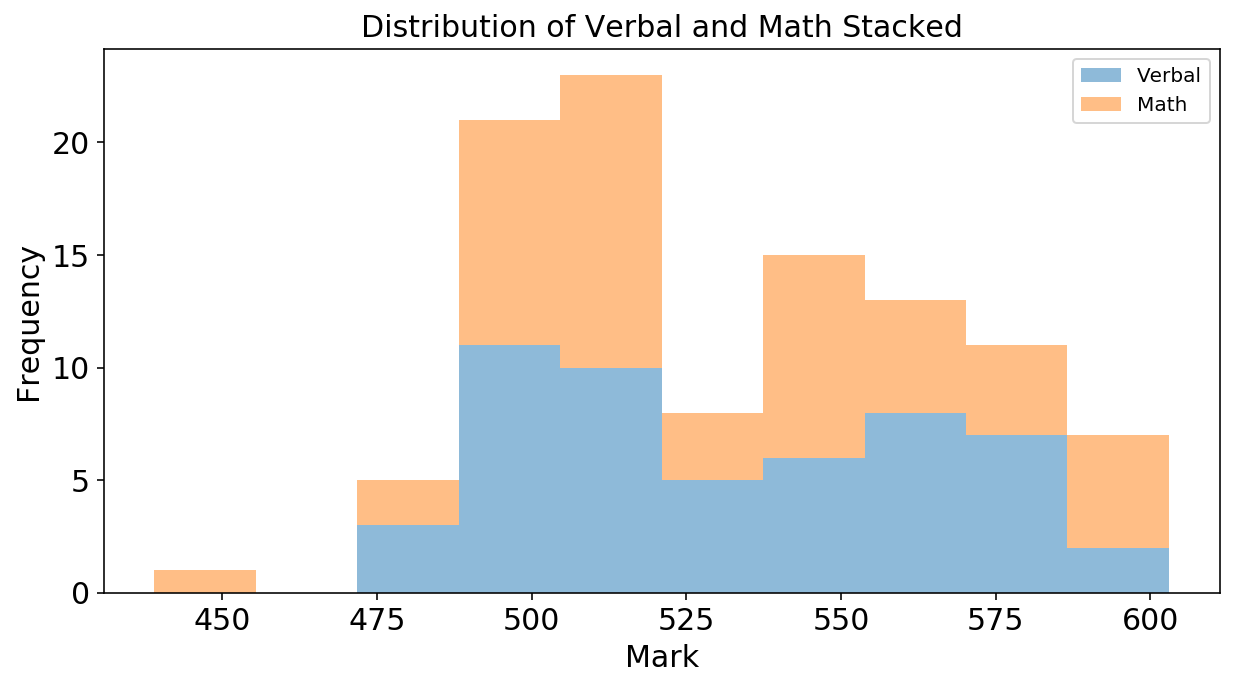

In [15]:
ax_stacked=df_sat[['Verbal','Math']].plot.hist(stacked=True,alpha=0.5,figsize=(10,5),fontsize=15)
ax_stacked.set_xlabel('Mark',fontsize=15)
ax_stacked.set_ylabel('Frequency',fontsize=15)
ax_stacked.set_title('Distribution of Verbal and Math Stacked',fontsize=15)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

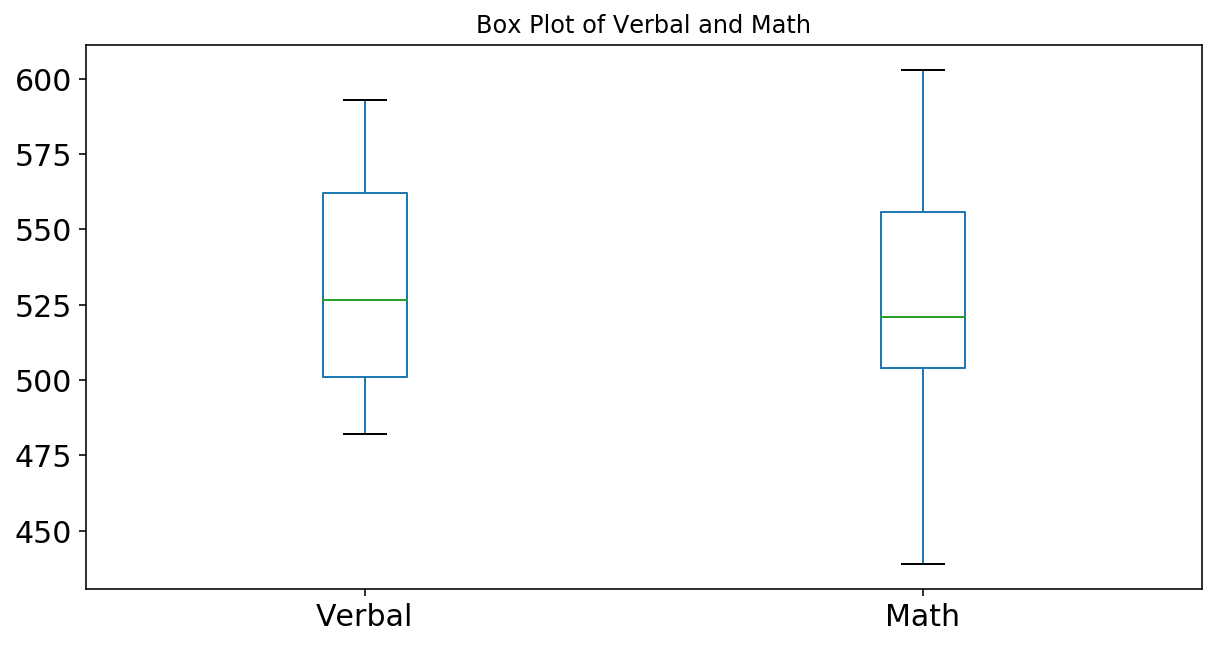

In [16]:
ax_box=df_sat[['Verbal','Math']].plot.box(figsize=(10,5),fontsize=15,sym='r+',title='Box Plot of Verbal and Math')

# Boxplot gives us a friendly visualization of statistical properties such as quantile, median .etc.

# The y-axis will be meaningless cause Verbal and Math are numerical marks, but Rate is ratio between 0 to 1, the Rate plot will be skewed.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


# Based on the old SAT scheme, full marks of Verbal and Math is 800 each. Hence, I will use the individual [(Math and Verbal score)/800]*100 to represent the Score to full marks ratio 

'''
Credit to https://www.quora.com/What-are-the-total-marks-in-SAT-exam:
"The old sat, available till January 2016, was of 2400 Marks, consisting of Critical Reading, Writing and mathematics. The redesigned SAT, available from March 2016, is of 1600 marks, consisting of Critical Reading and Math only." By Varad Bandishti, who answered Apr 5, 2016 
'''

In [17]:
df_sat_plot=df_sat.copy()

In [18]:
df_sat_plot[['Verbal','Math']]=(df_sat_plot[['Verbal','Math']]/800)*100

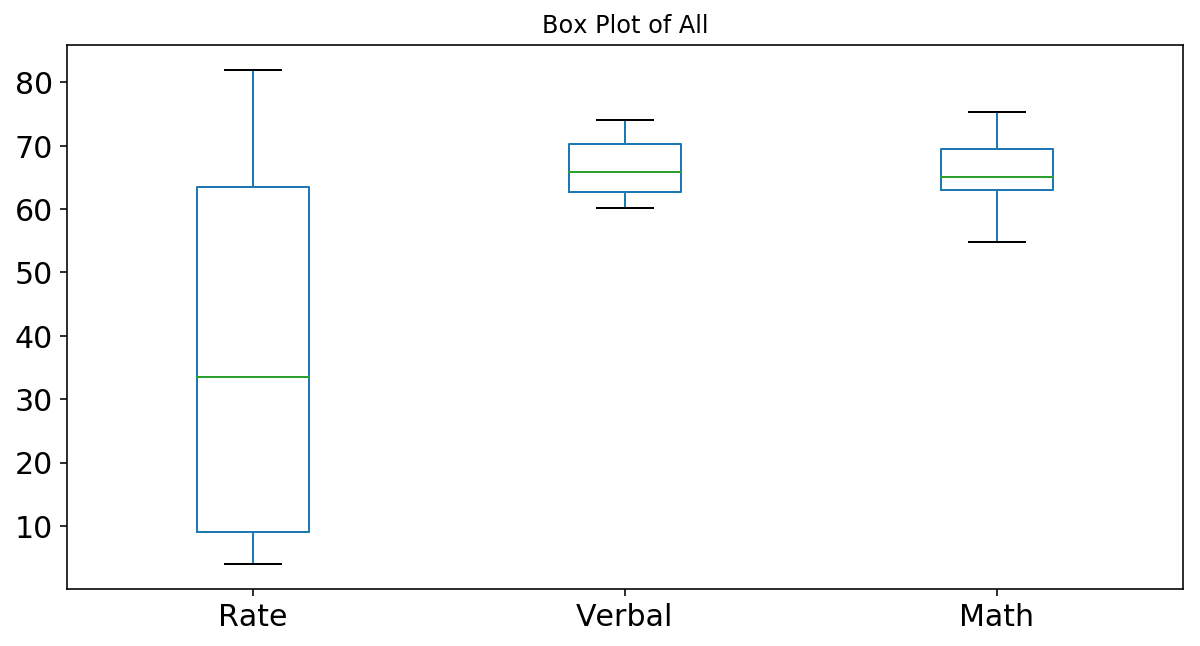

In [19]:
ax_box_all=df_sat_plot[['Rate','Verbal','Math']].plot.box(figsize=(10,5),fontsize=15,sym='r+',title='Box Plot of All')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
df_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [21]:
verbal_avg=df_sat['Verbal'].mean()
pprint.pprint(list(df_sat[df_sat['Verbal']>verbal_avg]['State']),width=200)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [22]:
verbal_avg

532.0192307692307

In [23]:
len(list(df_sat[df_sat['Verbal']>verbal_avg]['State']))

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
verbal_median=df_sat['Verbal'].median()
pprint.pprint(list(df_sat[df_sat['Verbal']>verbal_median]['State']),width=200)

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [25]:
verbal_median

526.5

In [26]:
len(list(df_sat[df_sat['Verbal']>verbal_median]['State']))

26

# Verbal average score is greater than median score which means if we use median score as filter, we will have more states in the list

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [27]:
temp_col=pd.DataFrame()
temp_col['State']=df_sat['State']
temp_col['Difference between Verbal and Math']=df_sat['Verbal']-df_sat['Math']
temp_col

,State,Difference between Verbal and Math
0,CT,-1
1,NJ,-14
2,MA,-4
3,NY,-10
4,NH,4
5,RI,2
6,PA,1
7,VT,5
8,ME,6
9,VA,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

# Verbal greater than Math

In [28]:
df_V_greater_M=temp_col[temp_col['Difference between Verbal and Math']>0].sort_values(by='Difference between Verbal and Math',ascending=False)
df_V_greater_M.head(3)

,State,Difference between Verbal and Math
27,OH,95
29,WV,15
50,MS,15


# Verbal less than Math

In [29]:
df_V_less_M=temp_col[temp_col['Difference between Verbal and Math']<0].sort_values(by='Difference between Verbal and Math',ascending=True)
df_V_less_M.head(3)

,State,Difference between Verbal and Math
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [30]:
df_sat.loc[:,'Rate':].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


# Rate and Verbal have a strong negative linear relationship
# Rate and Math have a strong negative linear relationship
# Verbal and Math have a strong positive linear relationship 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [32]:
df_sat.loc[:,'Rate':].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


# Covariance is a statistical term, defined as a systematic relationship between a pair of random variables, covariance indicates how two variables are related. A positive covariance means the variables are positively related, while a negative covariance means the variables are inversely related. However, it cannot tell us how much the selected two variables are related, we are not able to measure degree of correlation based on covariance. 
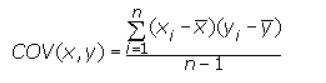
# Obviously covariance could be distorted by sample size of n. Hence, we can not directly draw a conclusion based on the result of covariace.
-----------------------------------------------------------------------------------------------------------------------------------------
# Correlation is described as a measure in statistics, which determines the degree to which two or more random variables move in tandem. It benefits us with a quantitative expression of how much two variables are related.

# In this case, correlation matrix is equal to covariance(x,y)/[(STDx)*(STDy)]

# Becuase correlation measures the degree that provides a measure to represent how much the 2 variables are correlated in range[-1,1]. 1 means exactly positive correlated and -1 means exactly negative correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
df_drug=pd.read_csv('./drug-use-by-age.csv')

In [34]:
df_drug.shape

(17, 28)

In [35]:
df_drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

# Based on the description and meaning of every column, drug and drug-frequency should be float number, but the datatype shows some of them are string, hence we need to perform data-cleaning before doing analysis and understand why the col type is string.

In [36]:
df_drug.select_dtypes(exclude=['float64'])

,age,n,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,2798,5.0,-,35.5,19.0,24.5,-
1,13,2757,1.0,3.0,-,12.0,41.0,5.0
2,14,2792,5.5,-,2.0,5.0,4.5,24.0
3,15,2956,4.0,9.5,1.0,5.5,3.0,10.5
4,16,3058,7.0,1.0,66.5,3.0,4.0,36.0
5,17,3038,5.0,21.0,64.0,4.0,6.0,48.0
6,18,2469,5.0,10.0,46.0,4.0,7.0,12.0
7,19,2223,5.5,2.0,180.0,3.0,7.5,105.0
8,20,2271,8.0,5.0,45.0,4.0,12.0,12.0
9,21,2354,5.0,17.0,30.0,2.0,13.5,2.0


# age col is expected to seperate differrent age groups
# n should be sample size which is integer
# Other cols are affected by '-', so I will replace the '-' by np.NAN first

In [37]:
df_drug['n']=df_drug['n'].astype('int')

In [38]:
for col in df_drug.loc[:,'alcohol-use':].select_dtypes(exclude=['float64']).columns:
    df_drug[col]=df_drug[col].replace('-',np.NAN).astype('float64')

In [39]:
df_drug.dtypes.value_counts()

float64    26
object      1
int32       1
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
drug_frequency=[]
for item in df_drug.columns:
    if 'frequency' in item:
        drug_frequency.append(item)

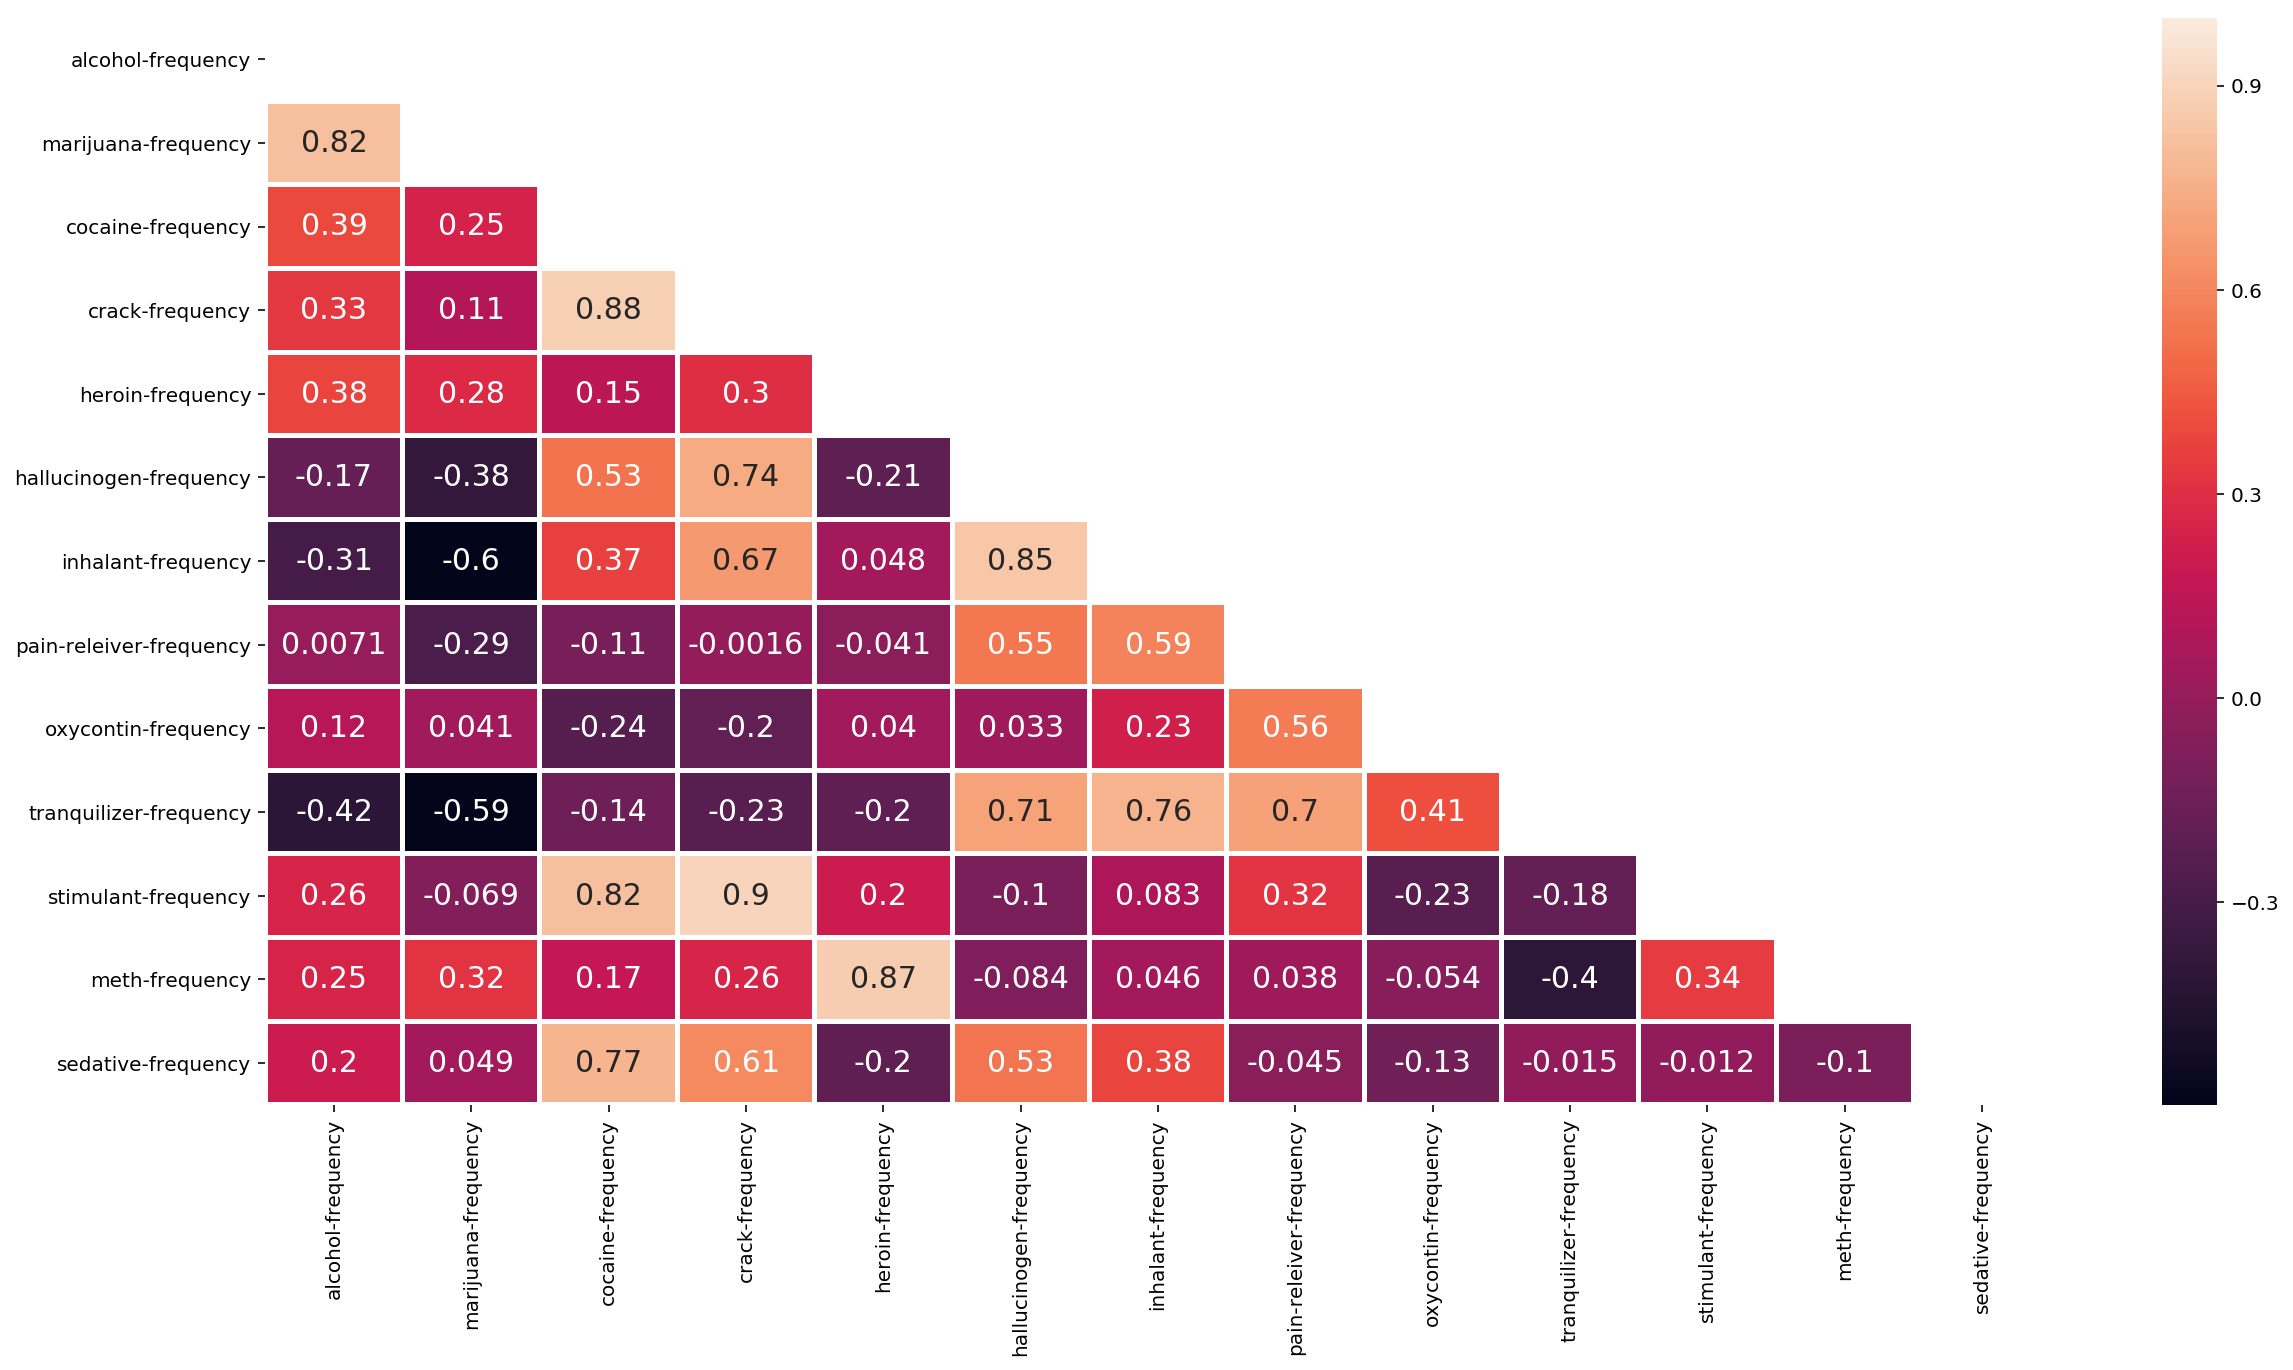

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
filter_upper_off = np.zeros_like(df_drug[drug_frequency].corr(), dtype=np.bool)
filter_upper_off[np.triu_indices_from(filter_upper_off)] = True
sns.heatmap(df_drug[drug_frequency].corr(), linewidths=2, annot=True,ax=ax,annot_kws={"size": 15},mask=filter_upper_off)
plt.rc('font',size=15)

In [42]:
drug_use=[]
for item in df_drug.columns:
    if 'use' in item:
        drug_use.append(item)

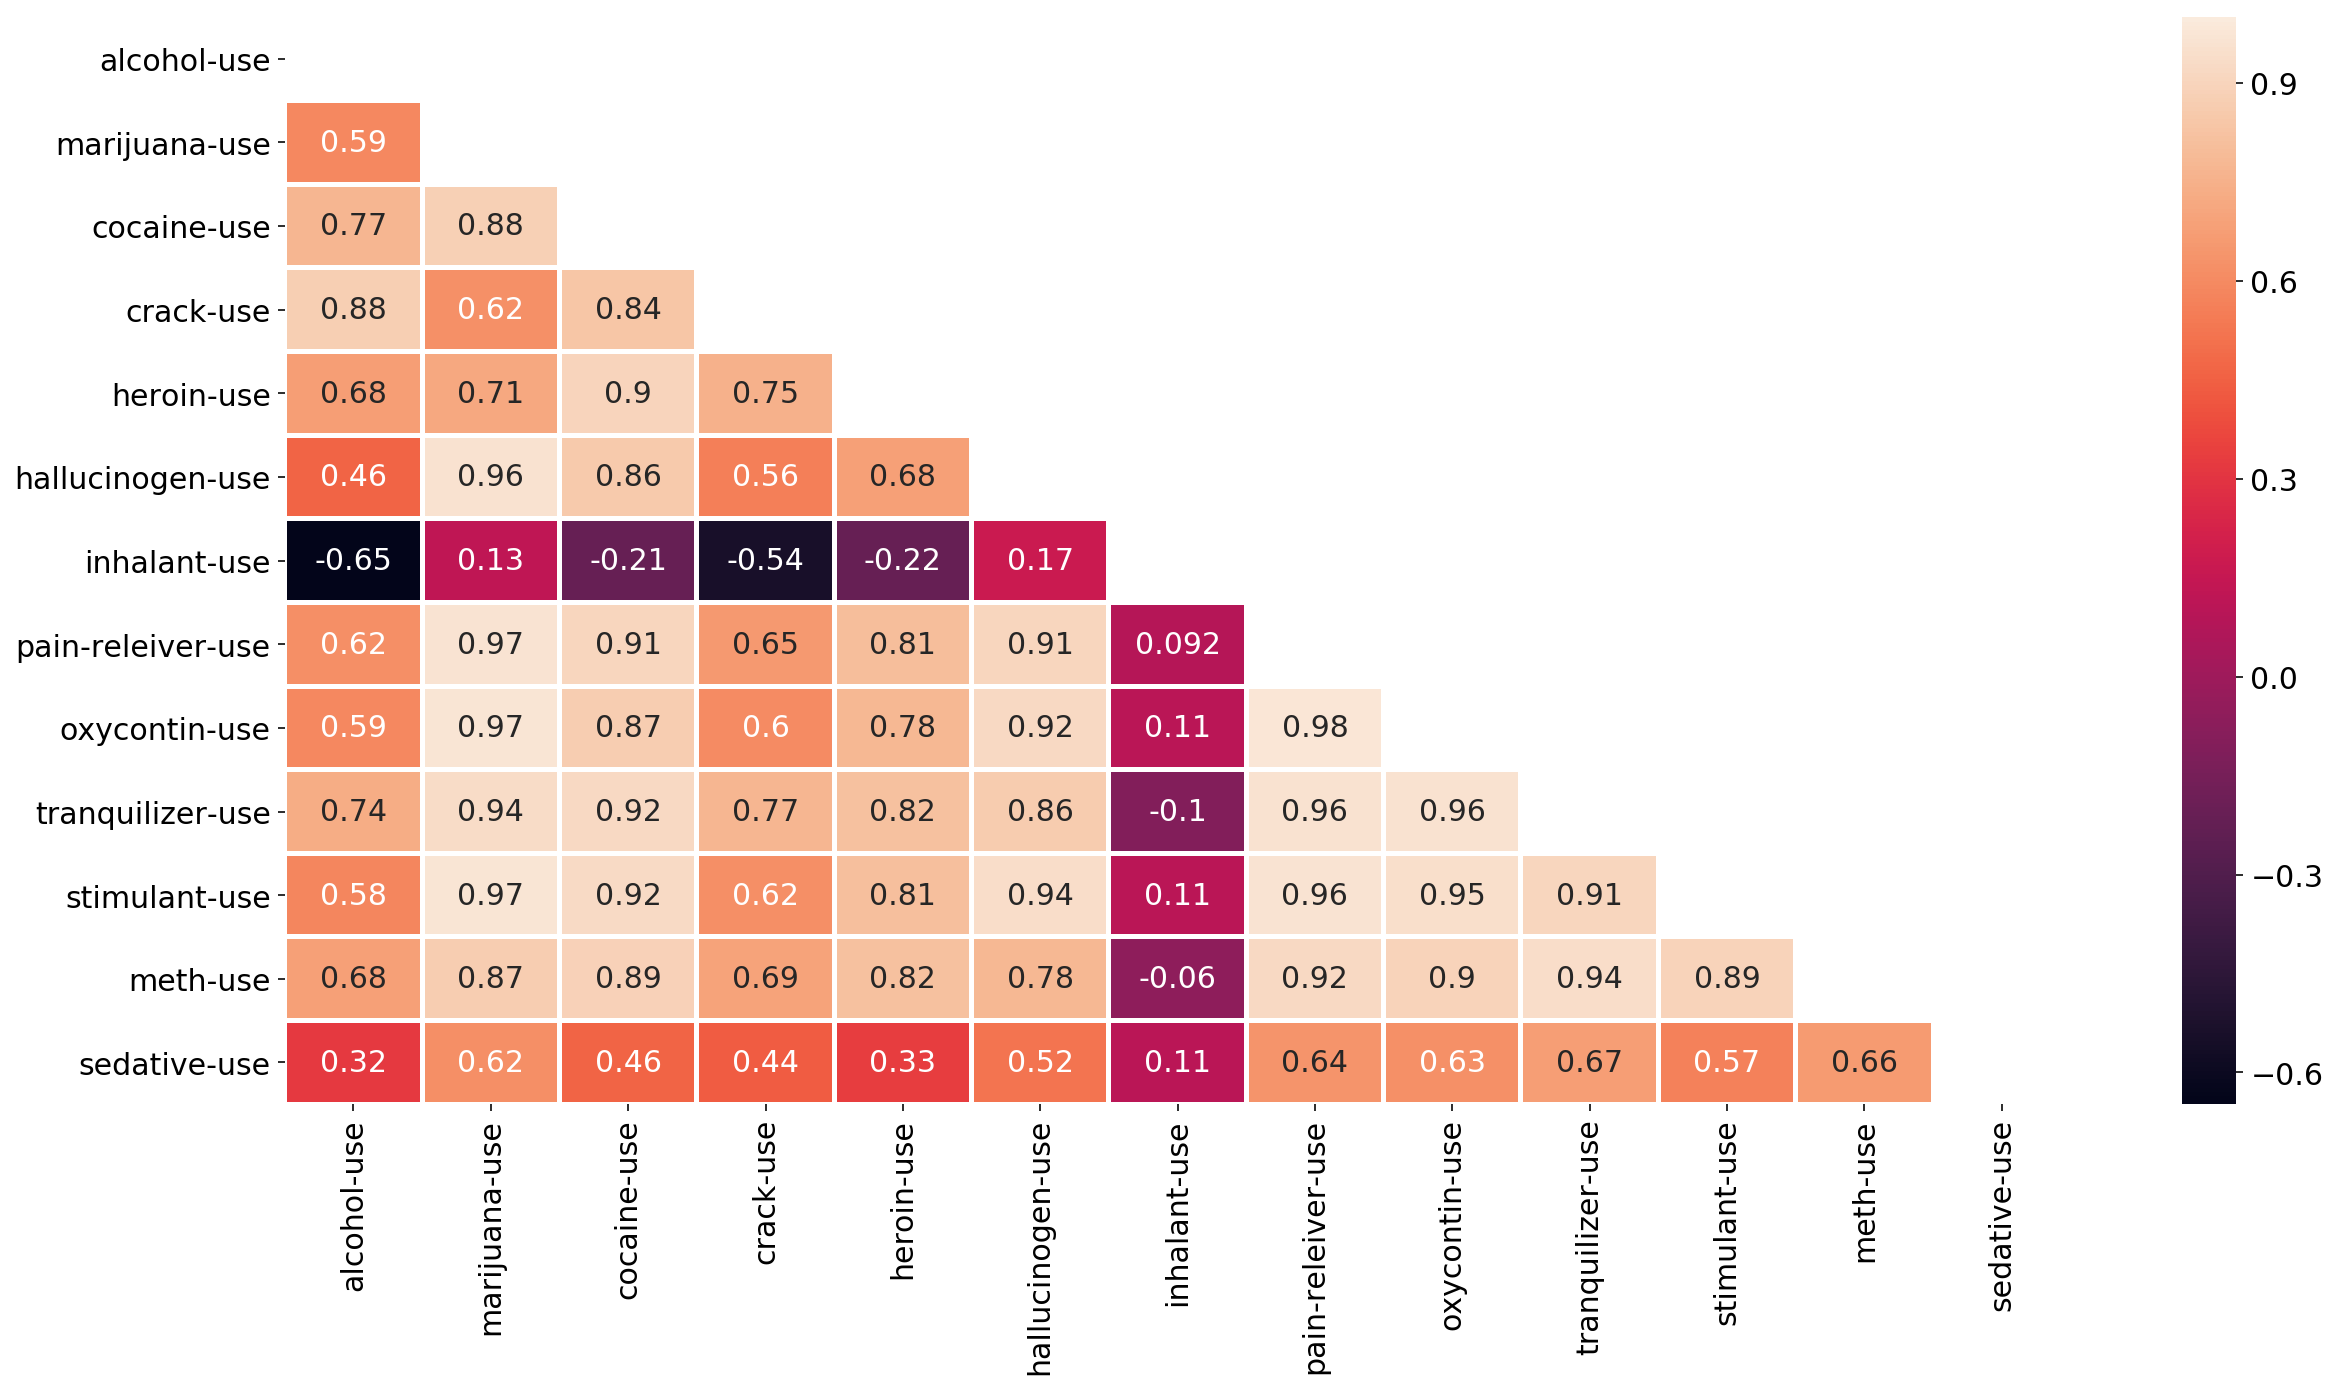

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
filter_upper_off = np.zeros_like(df_drug[drug_use].corr(), dtype=np.bool)
filter_upper_off[np.triu_indices_from(filter_upper_off)] = True
sns.heatmap(df_drug[drug_use].corr(), linewidths=2, annot=True,ax=ax,annot_kws={"size": 15},mask=filter_upper_off)
plt.rc('font',size=15)

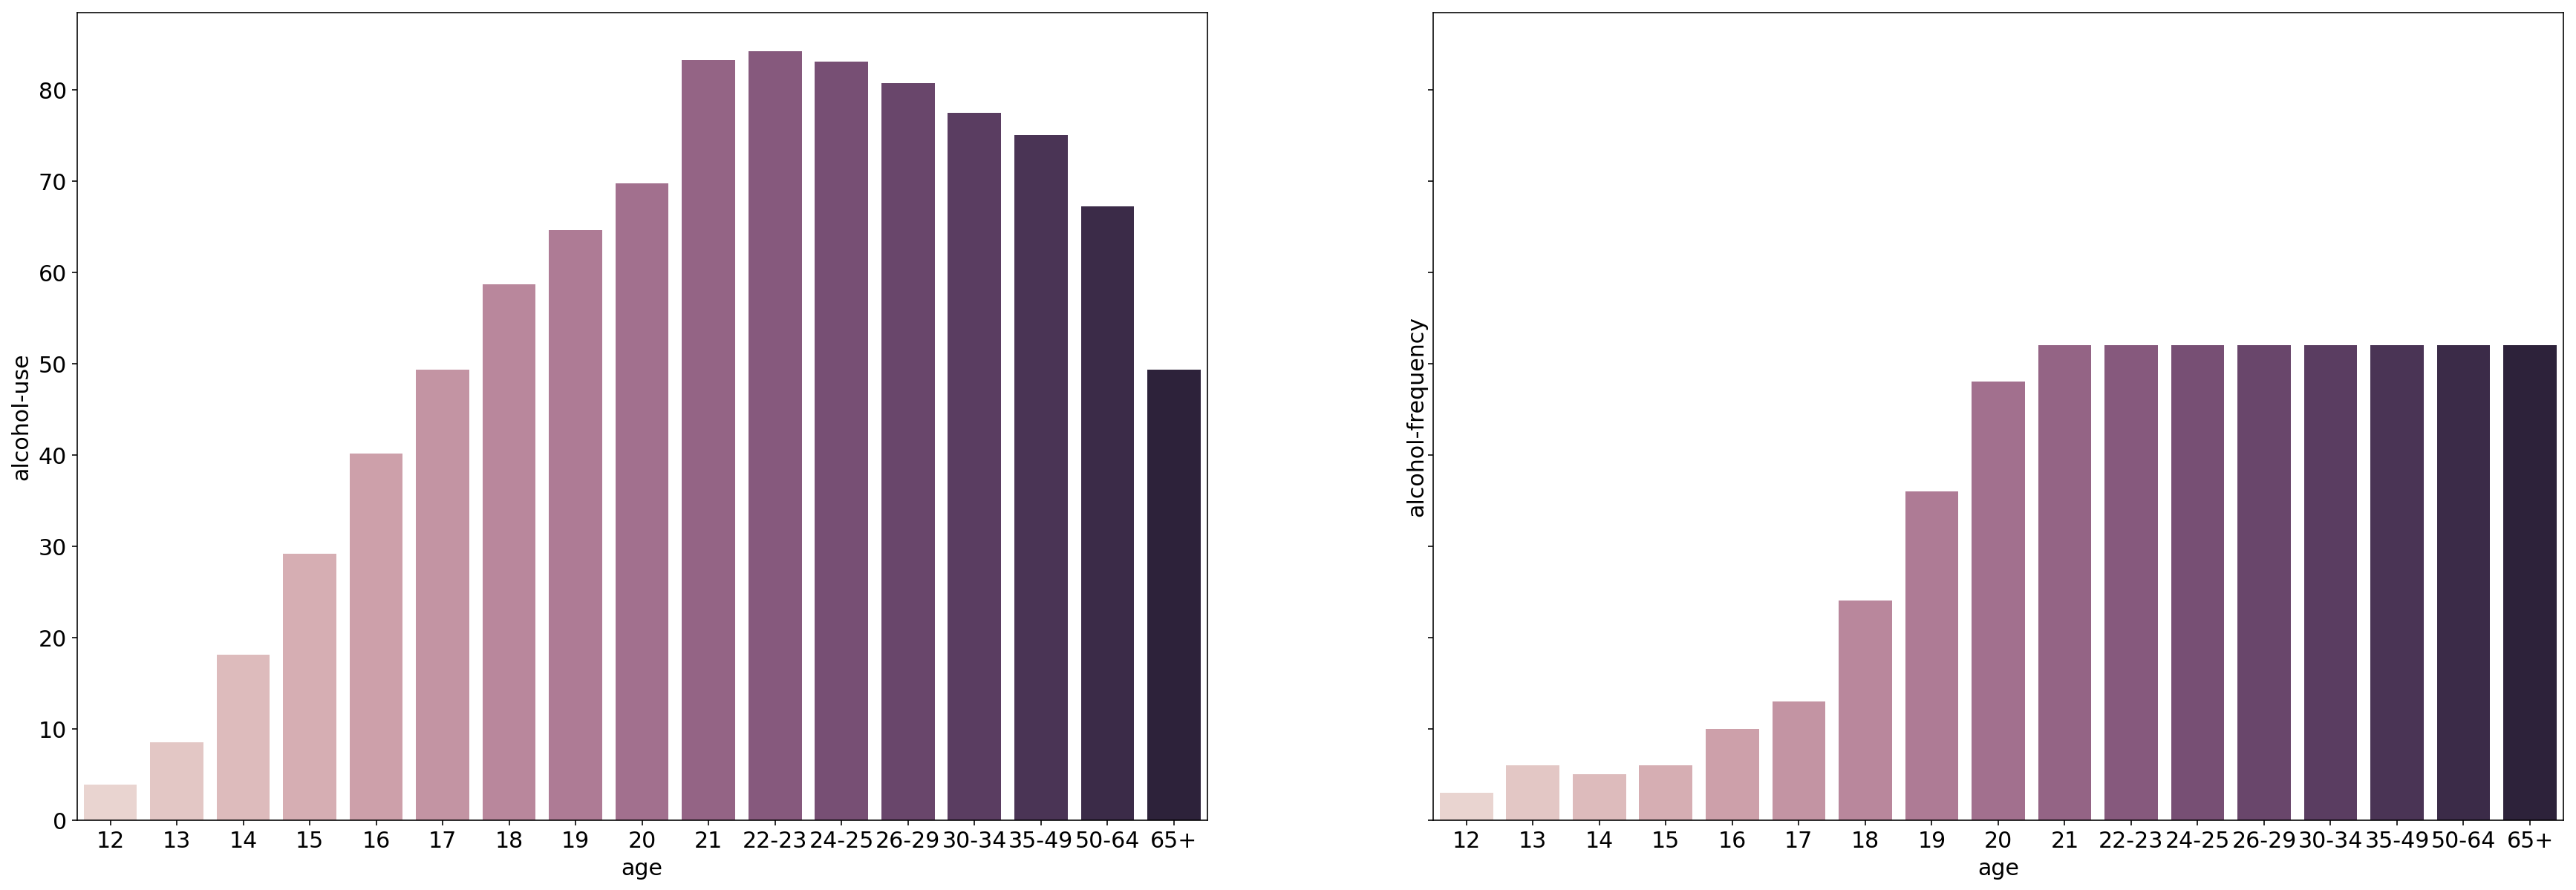

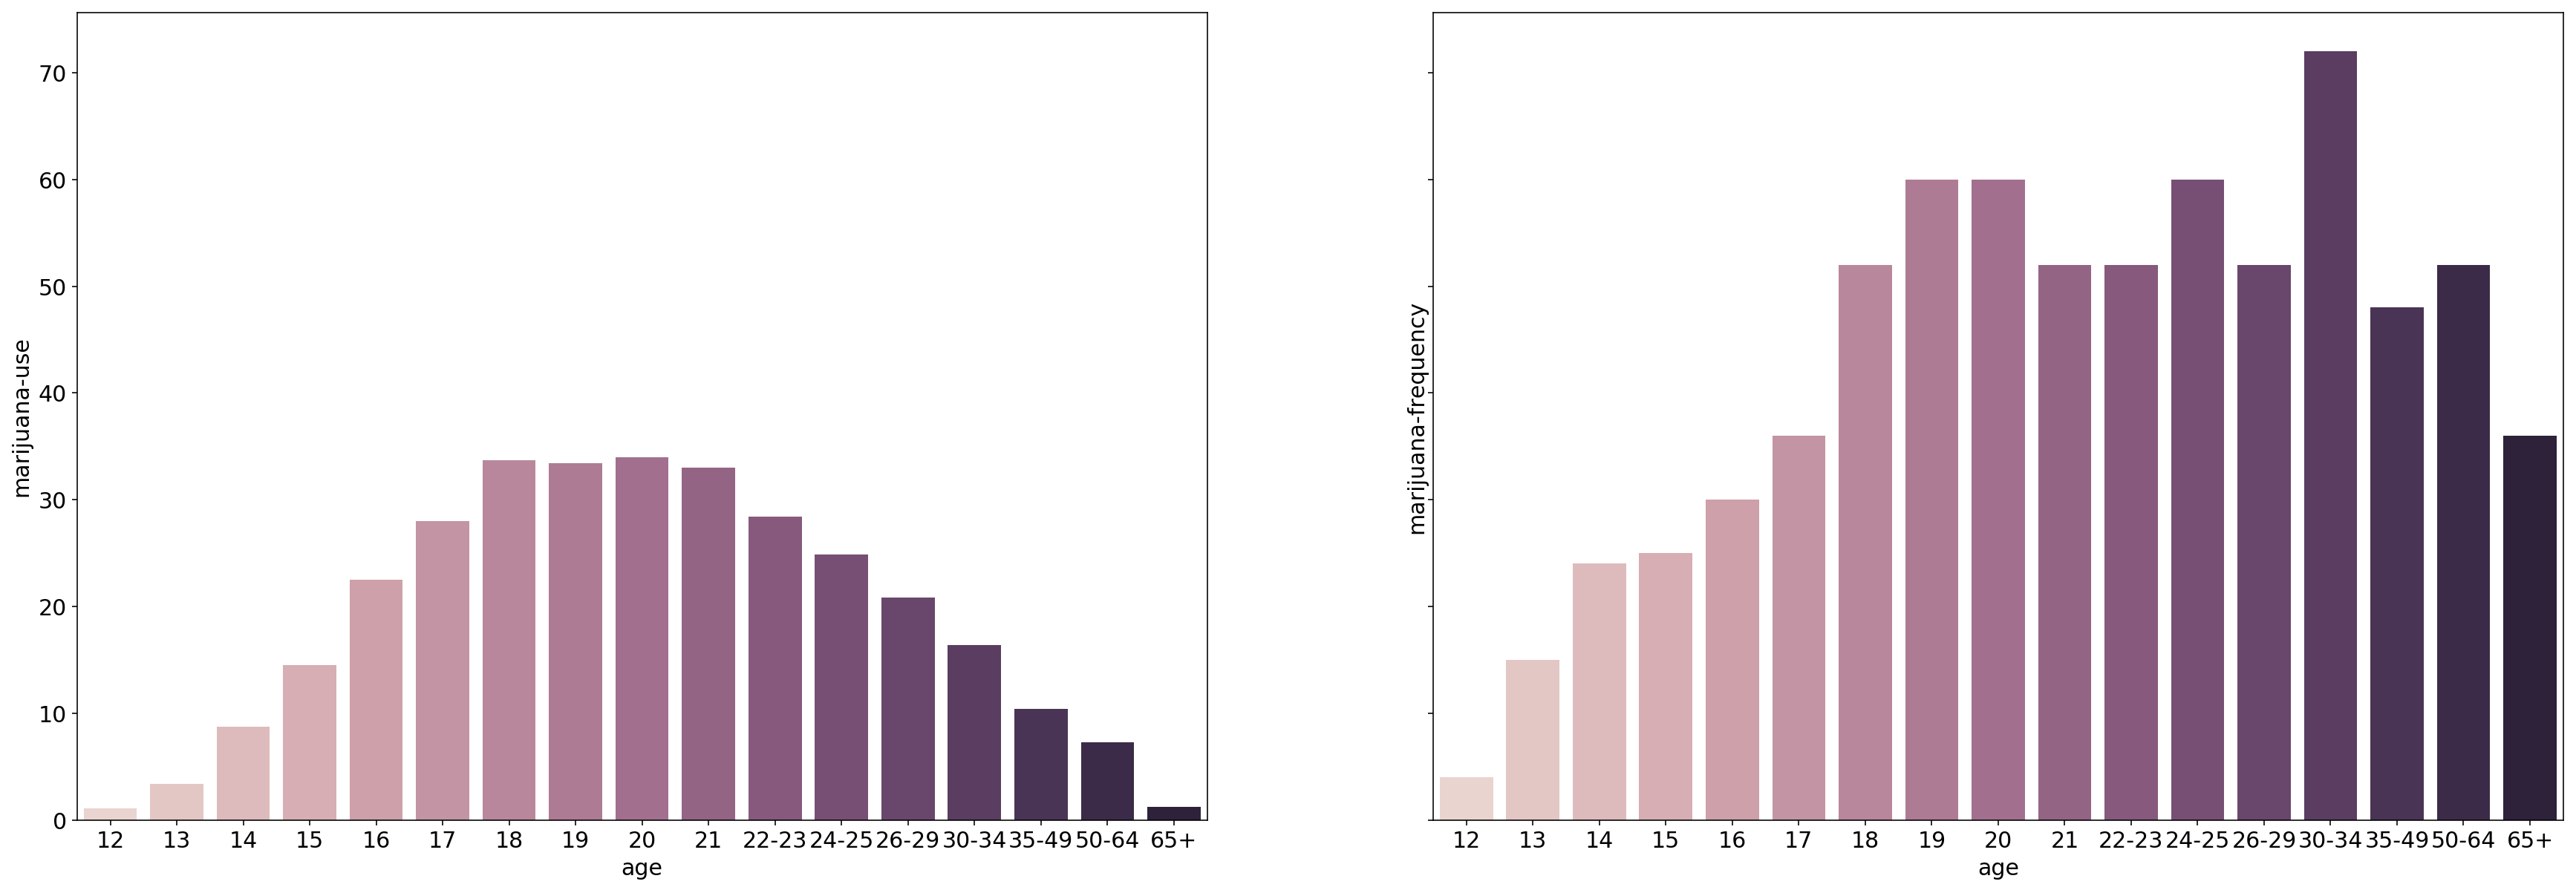

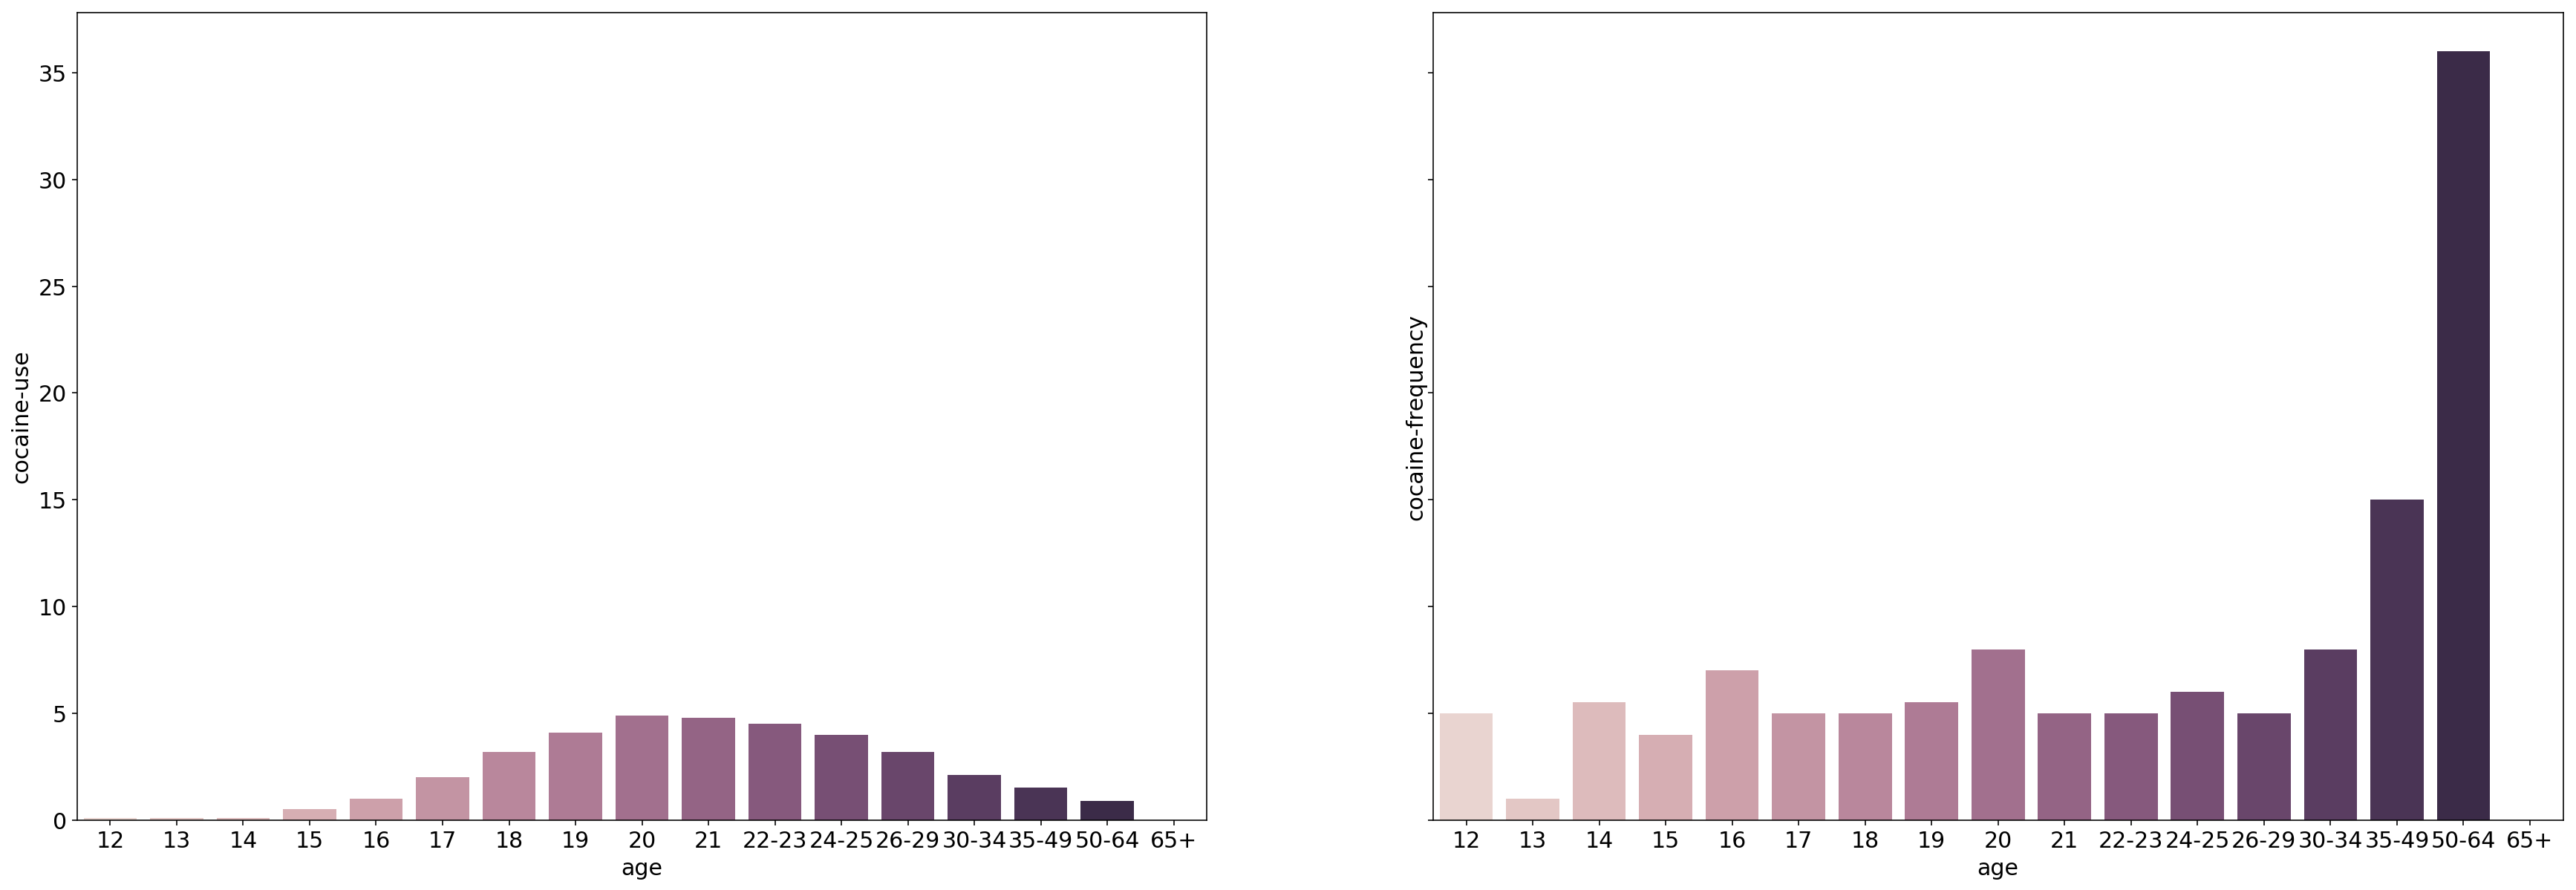

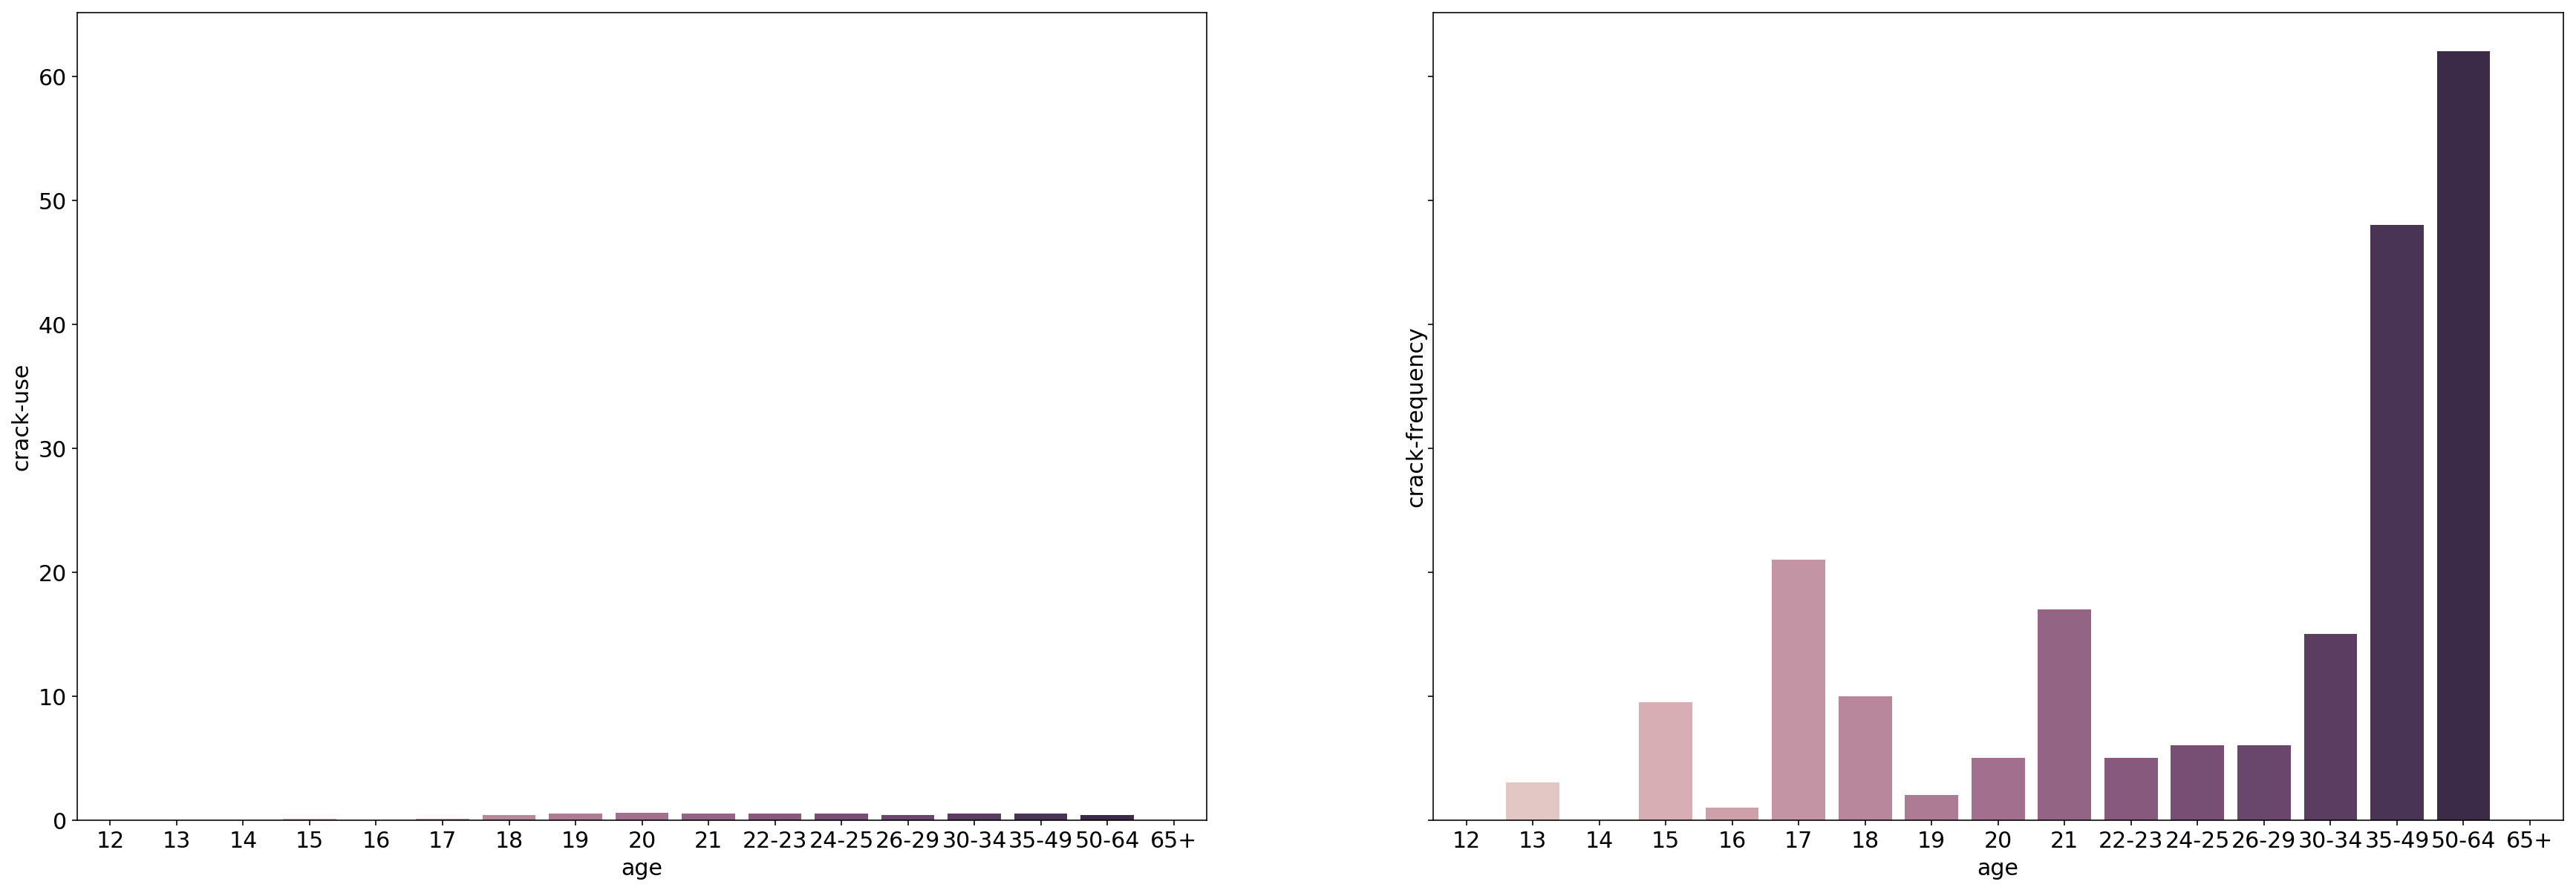

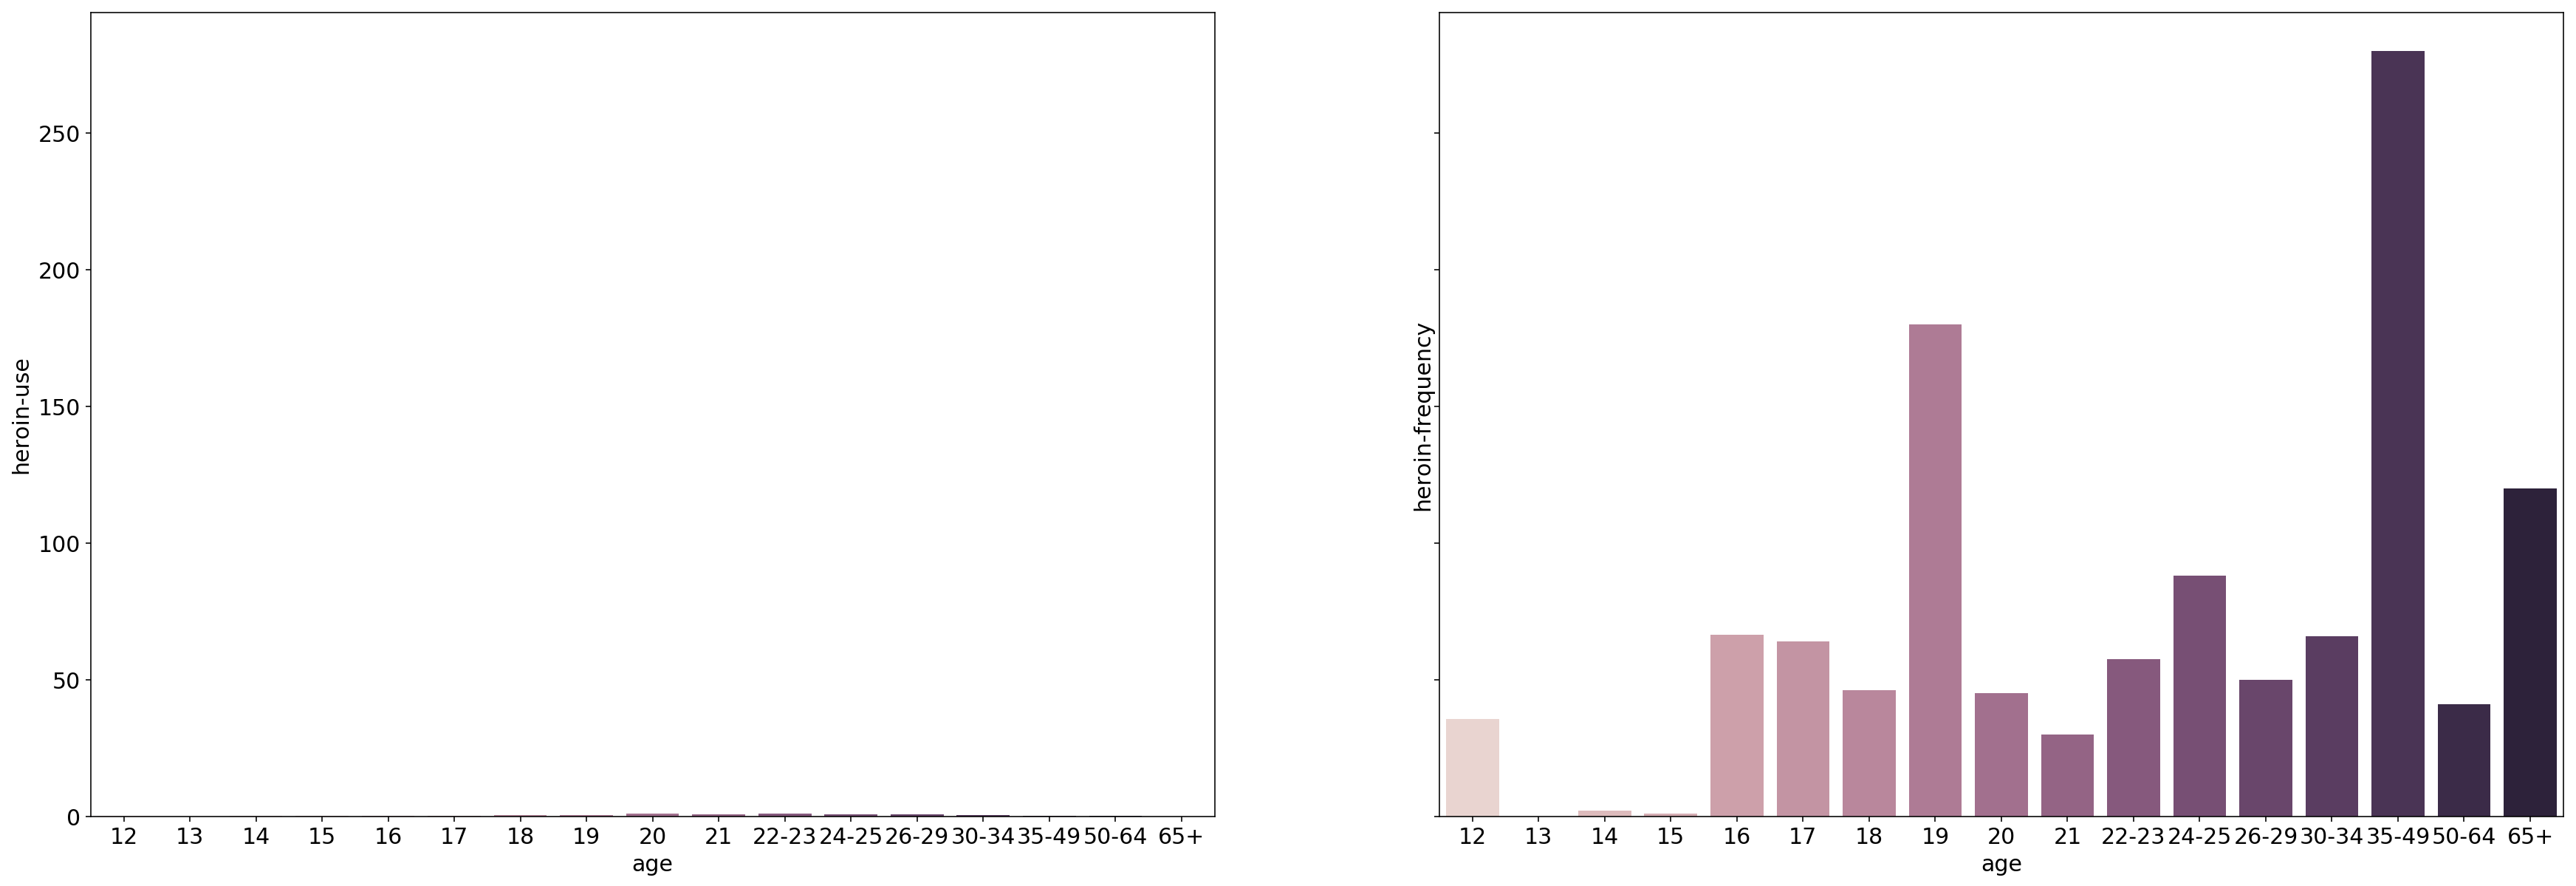

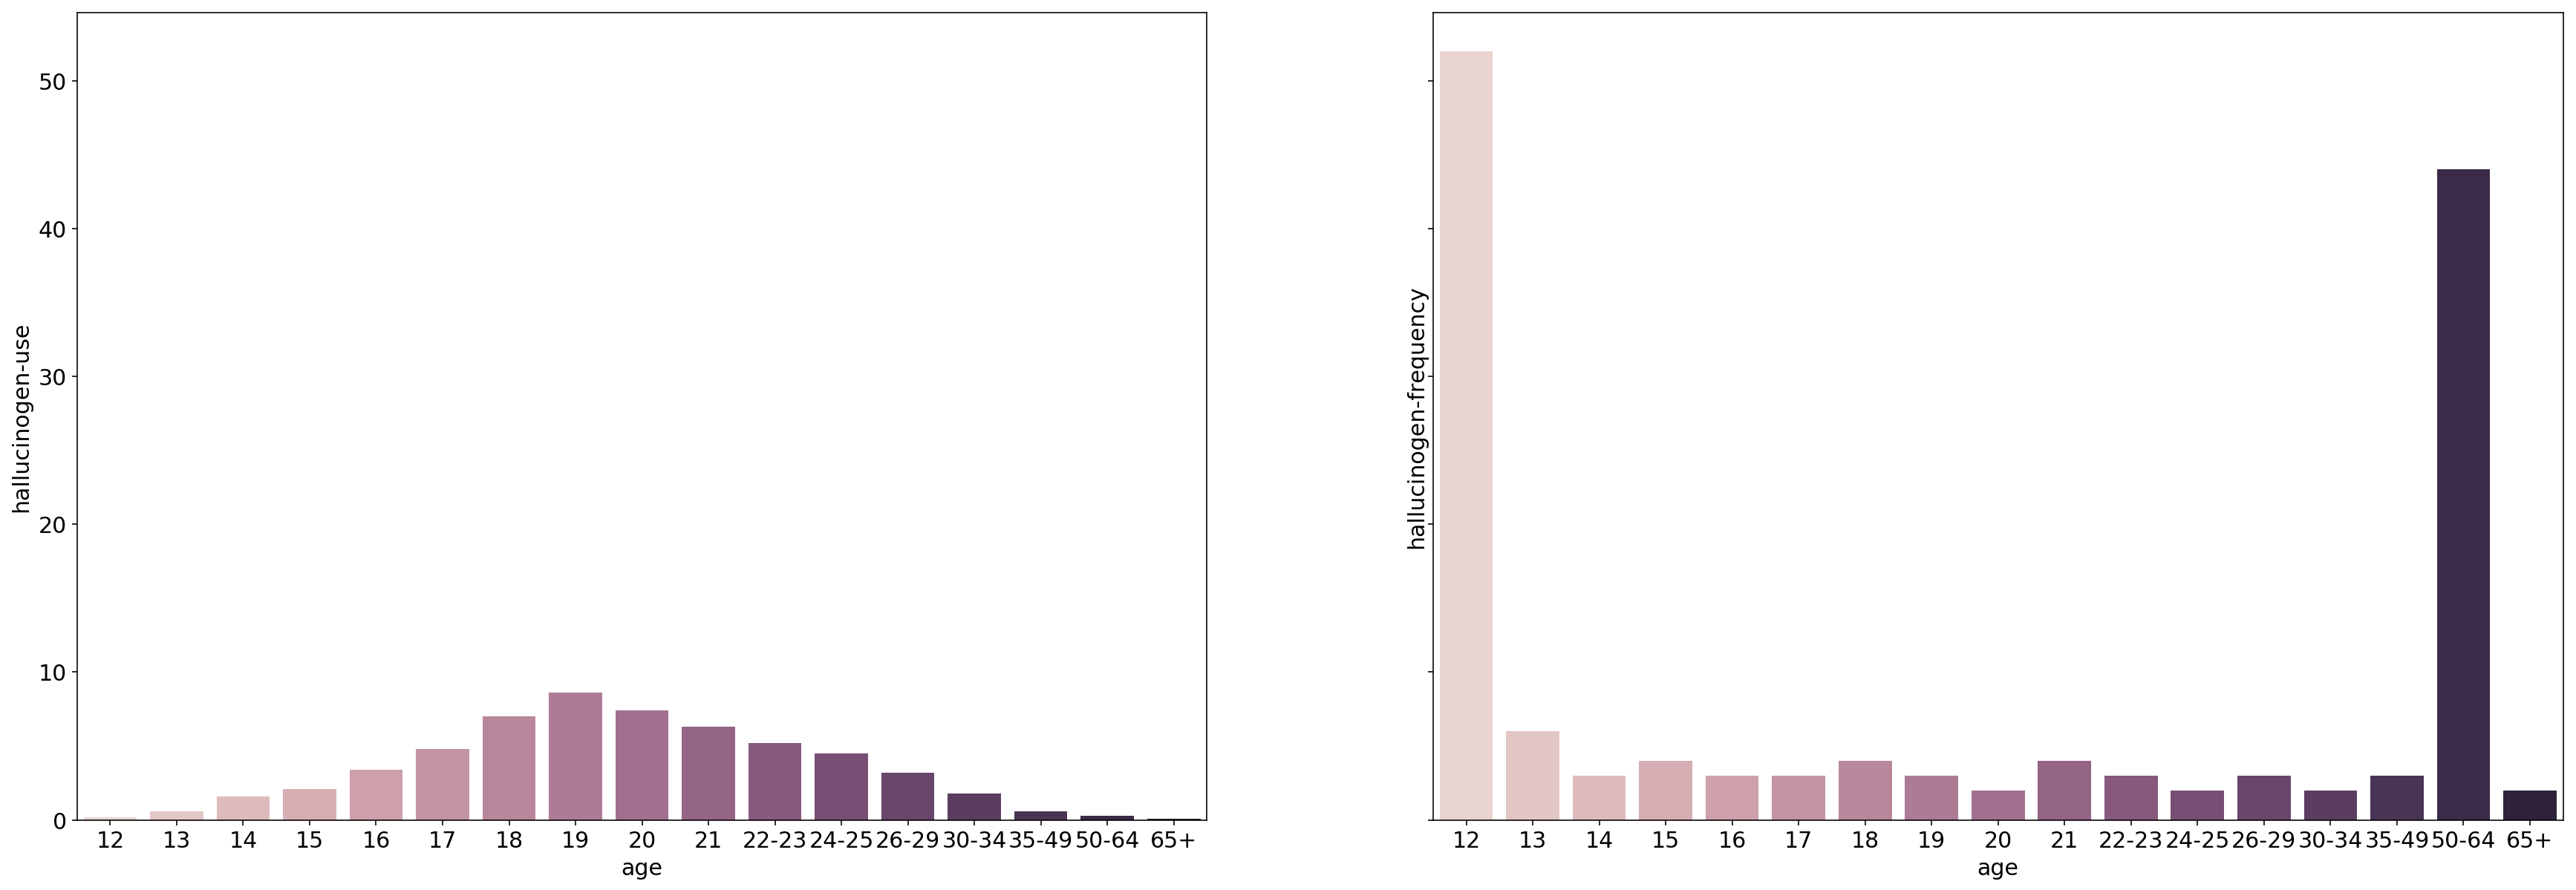

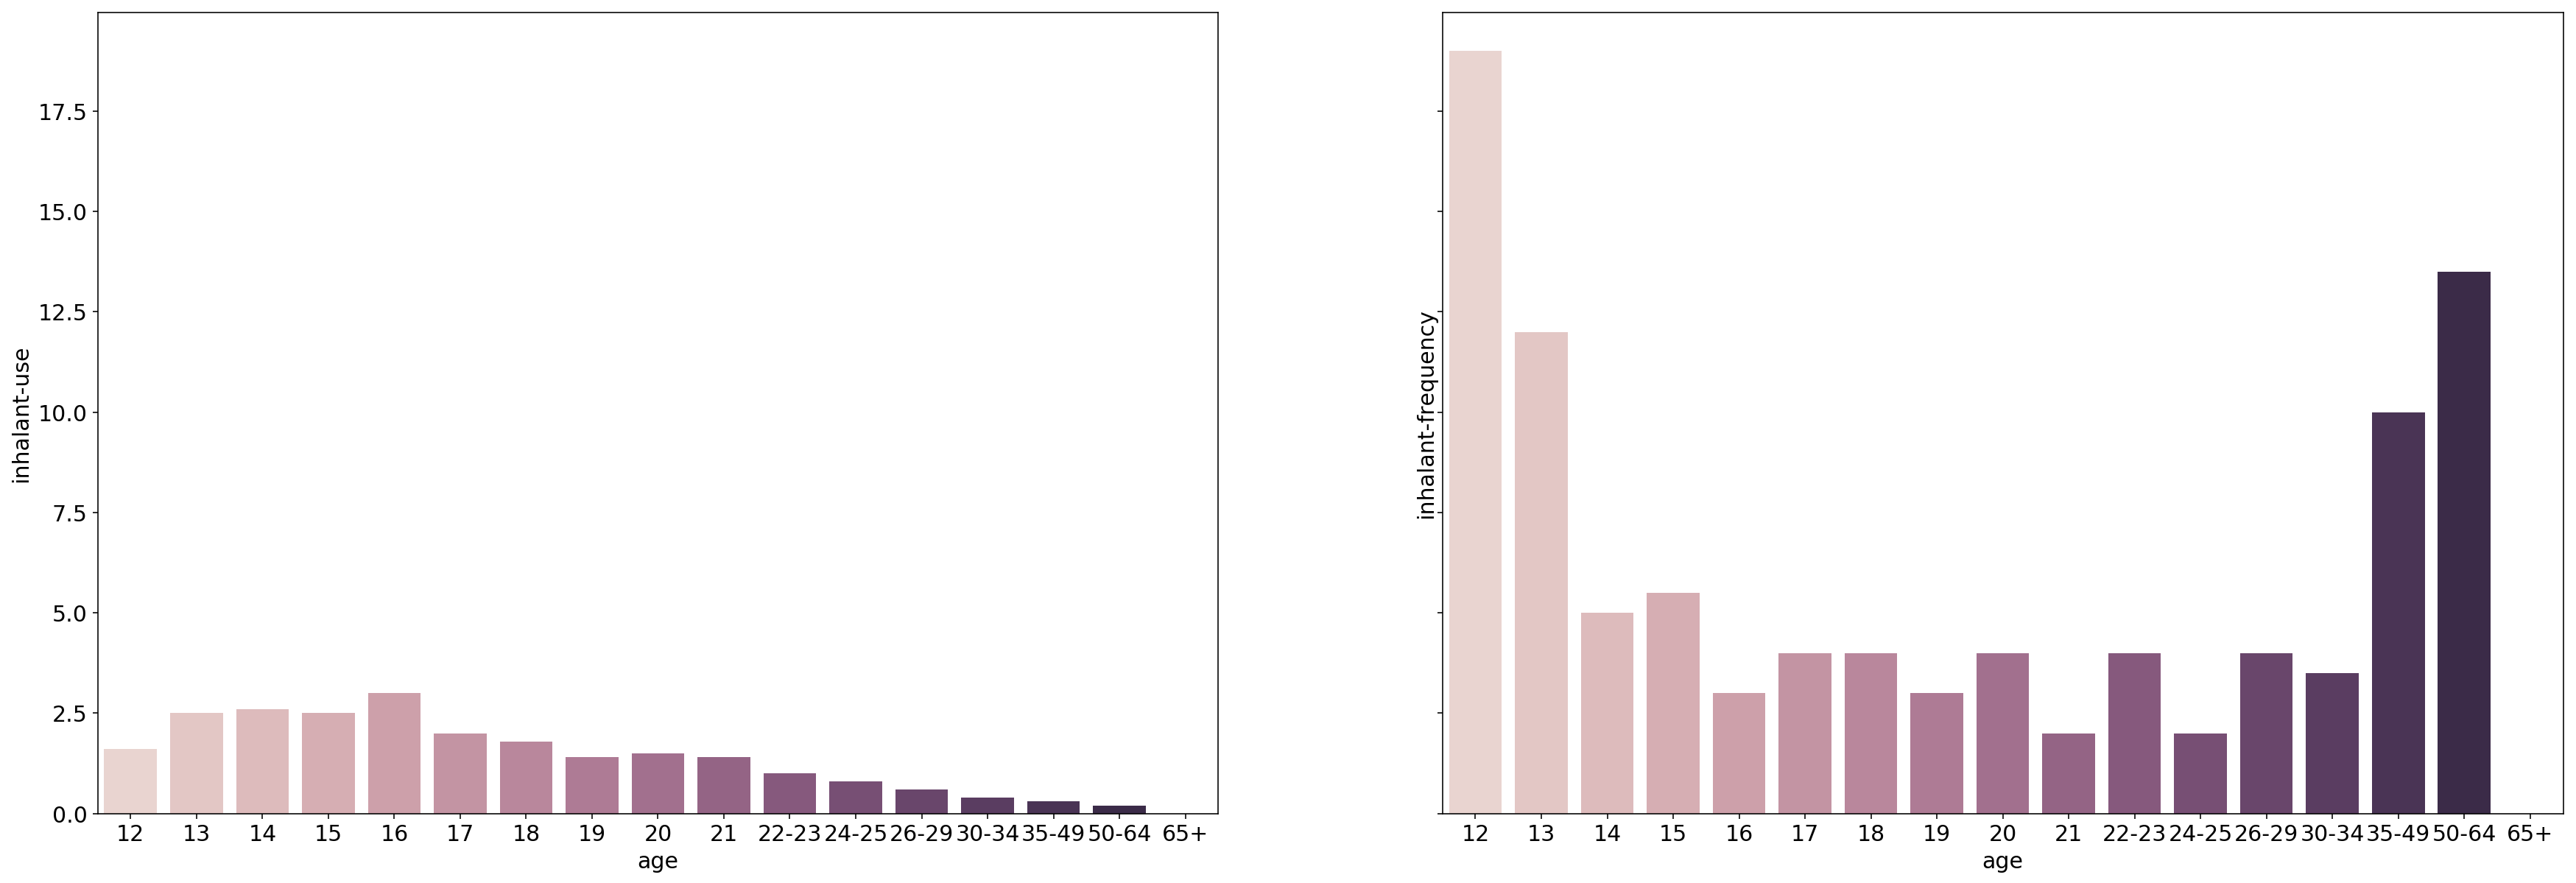

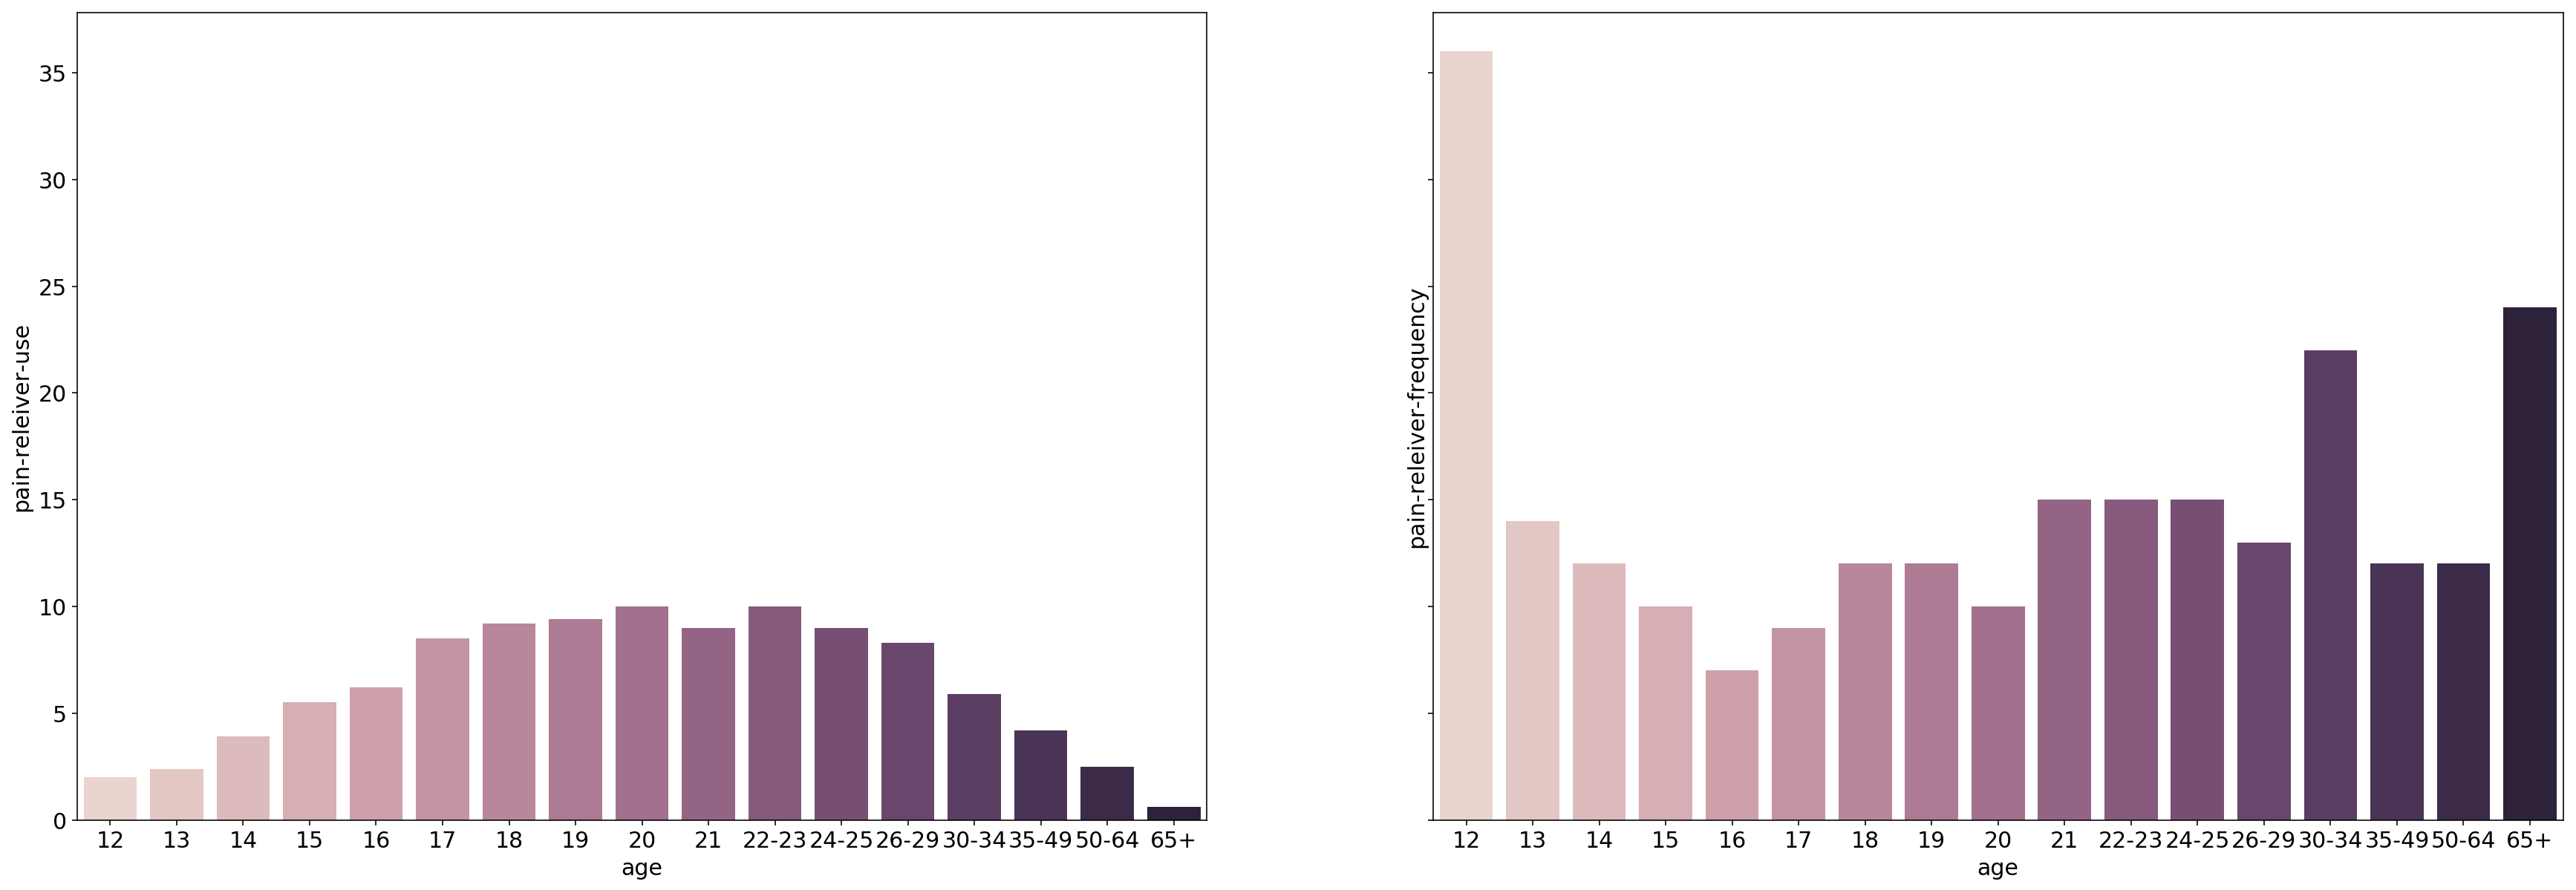

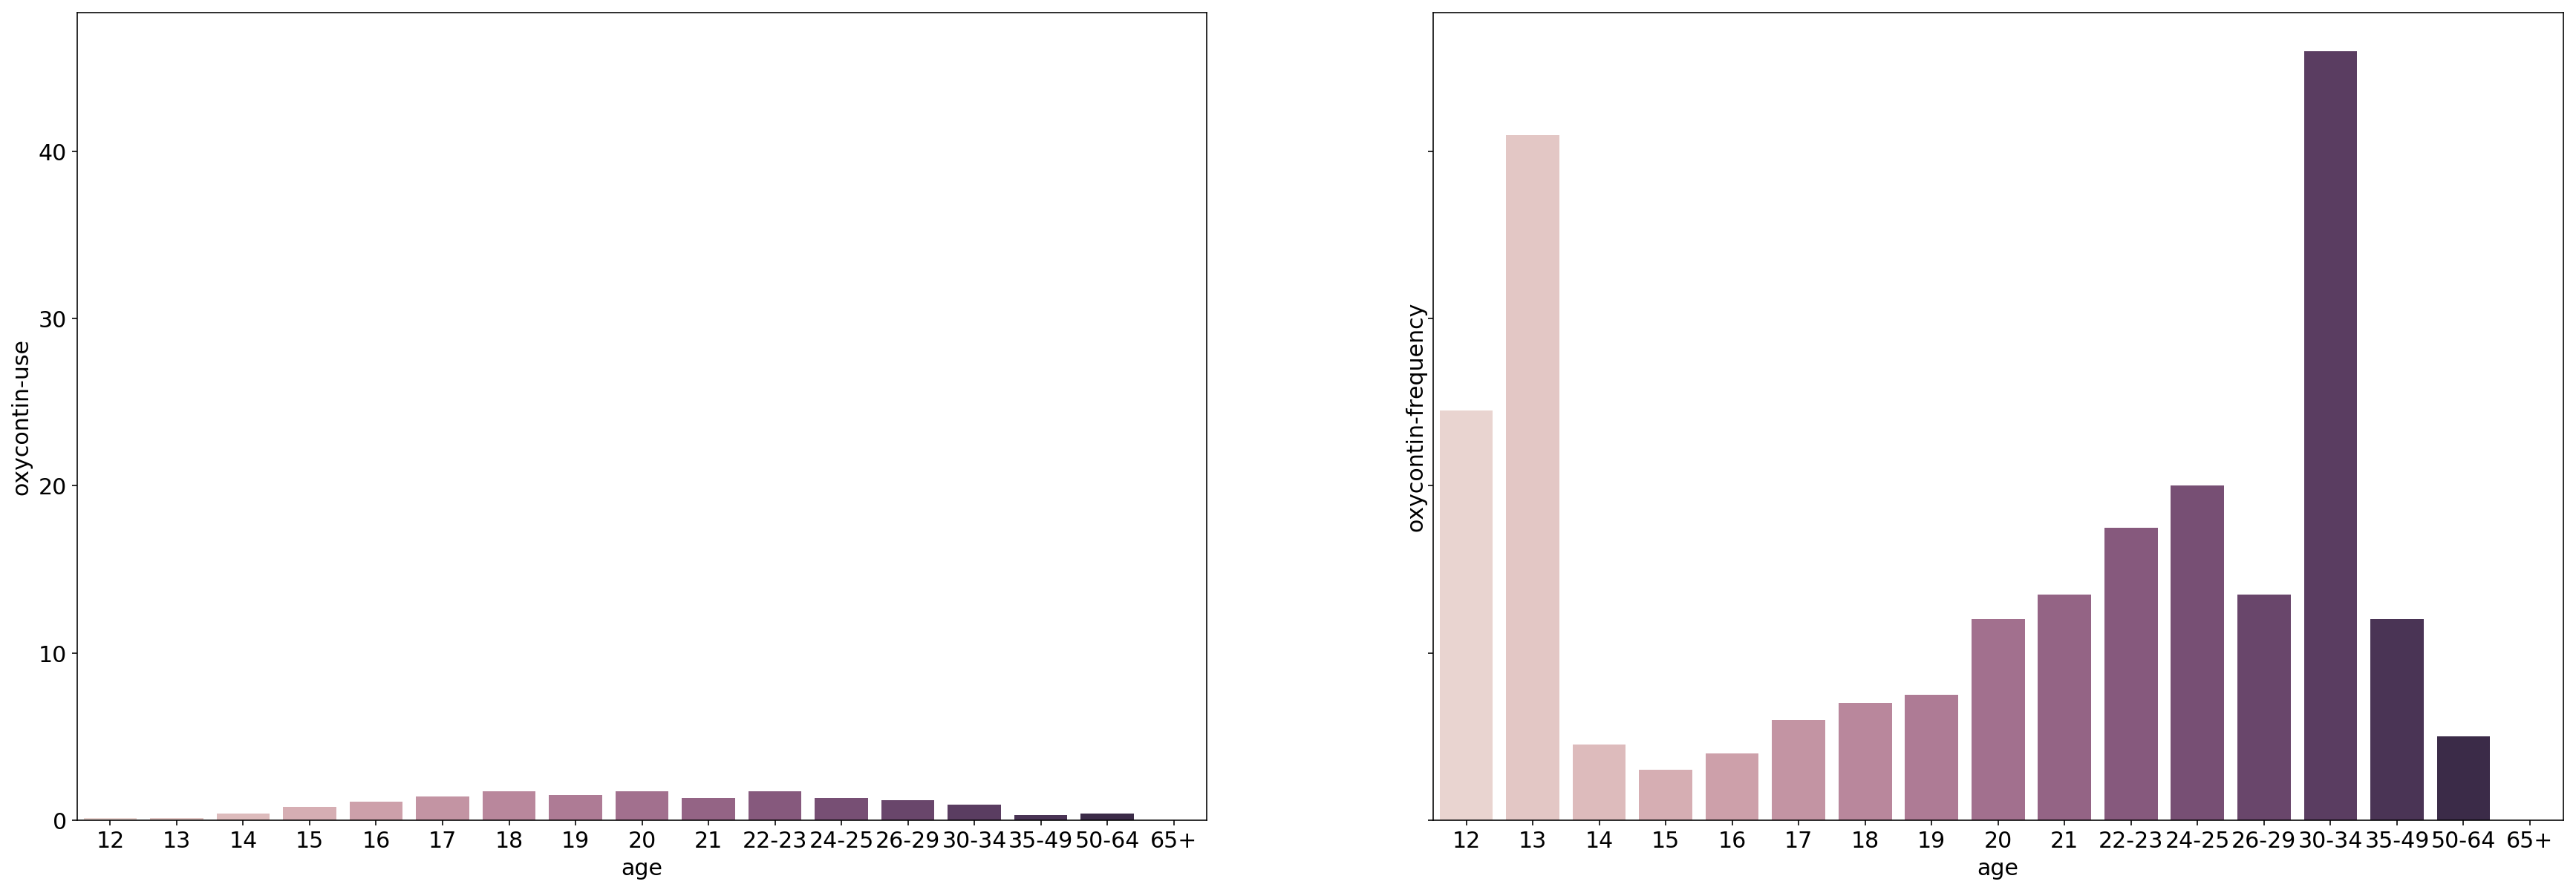

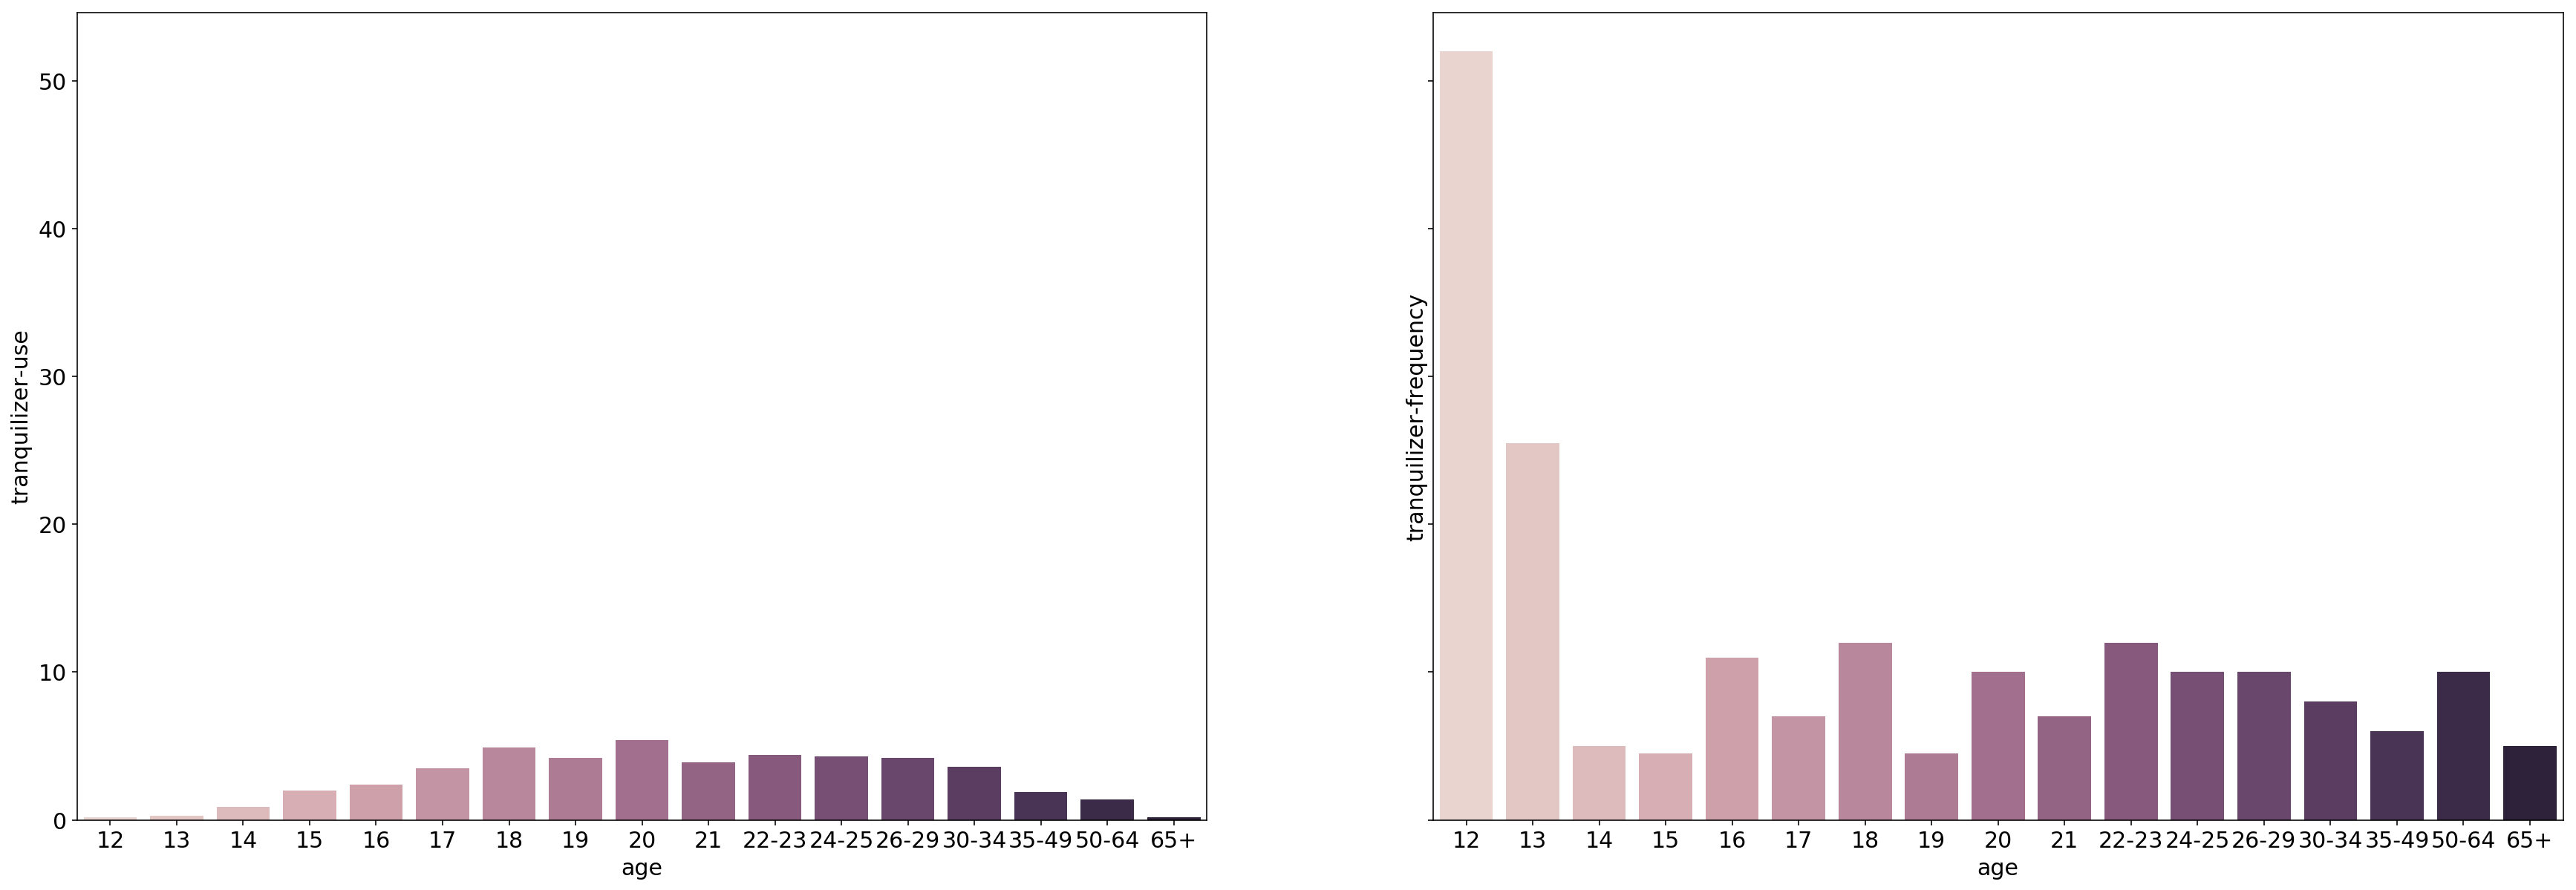

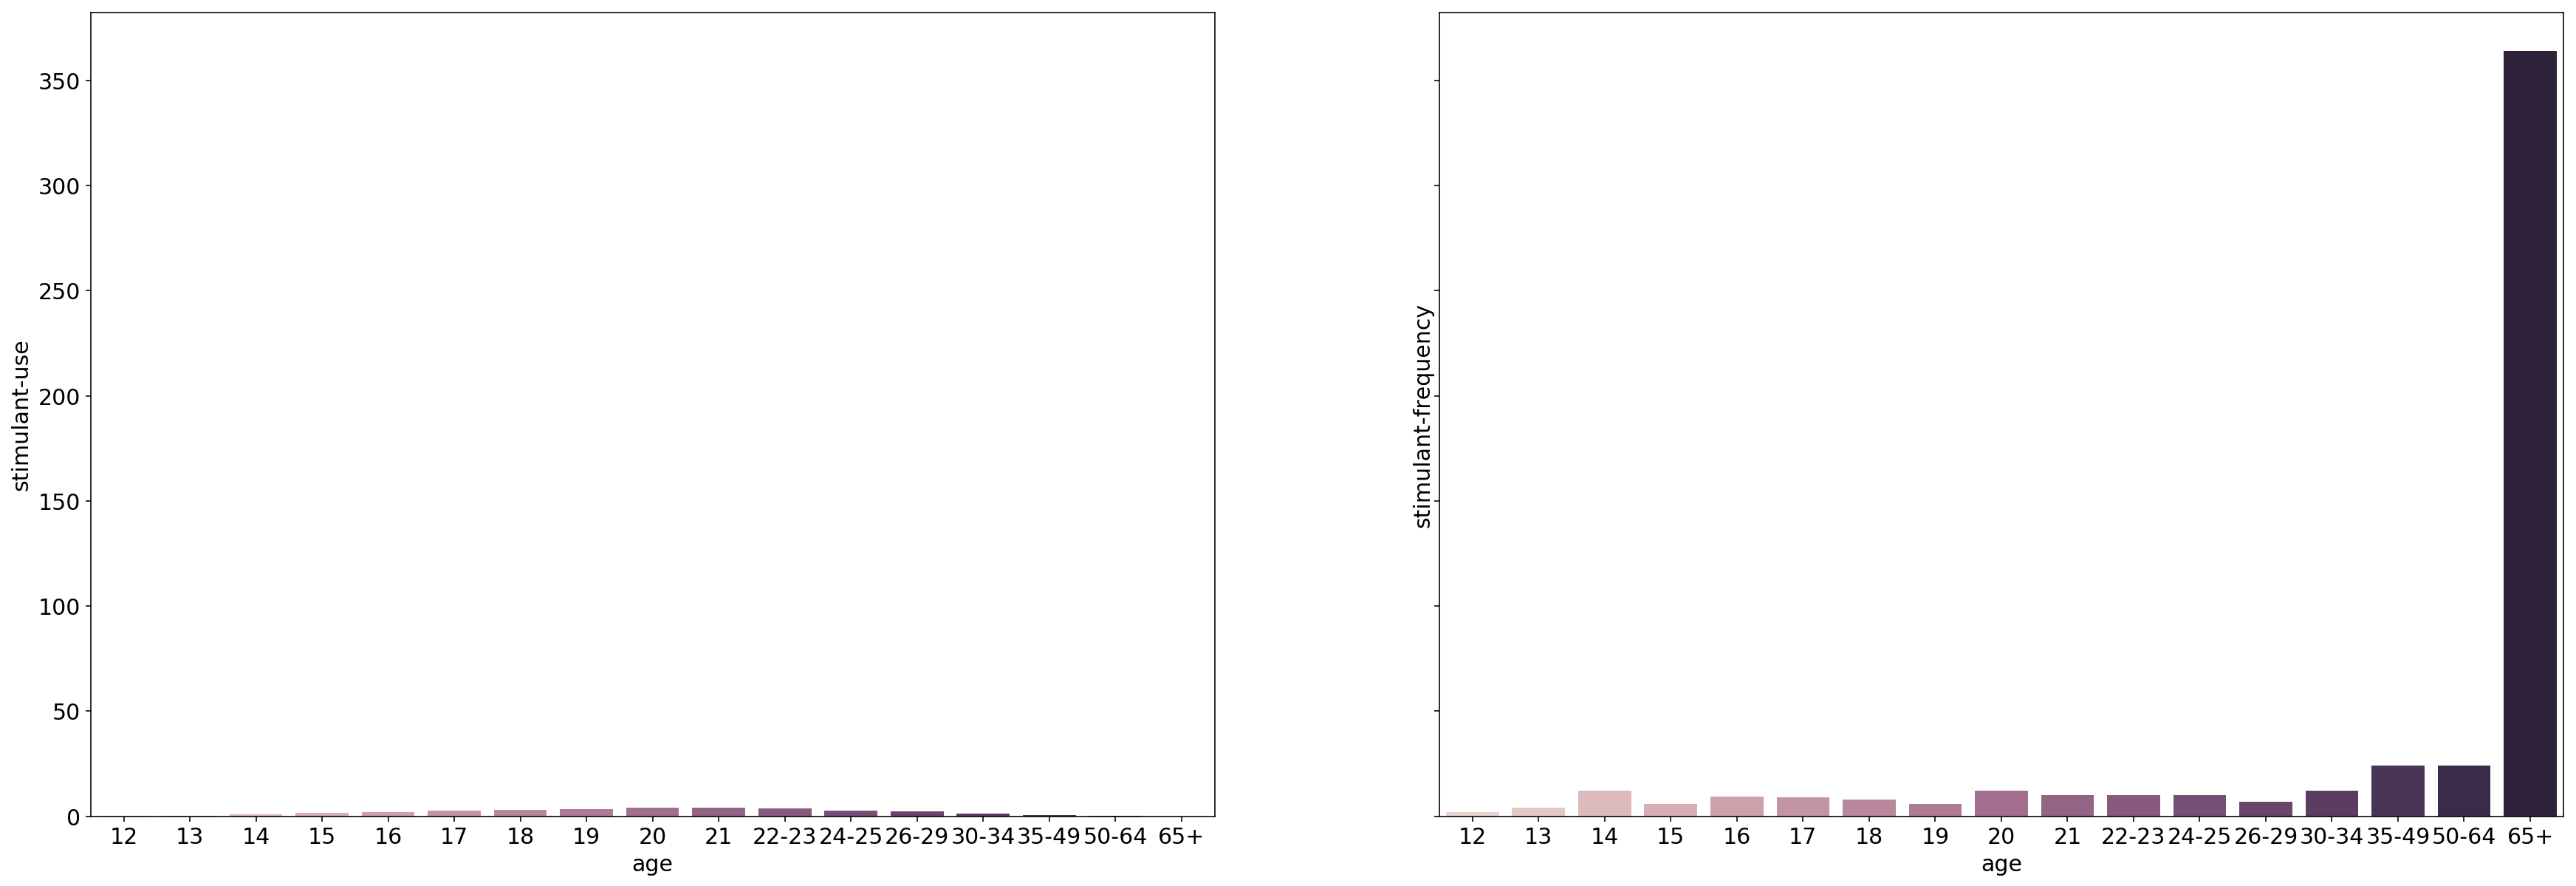

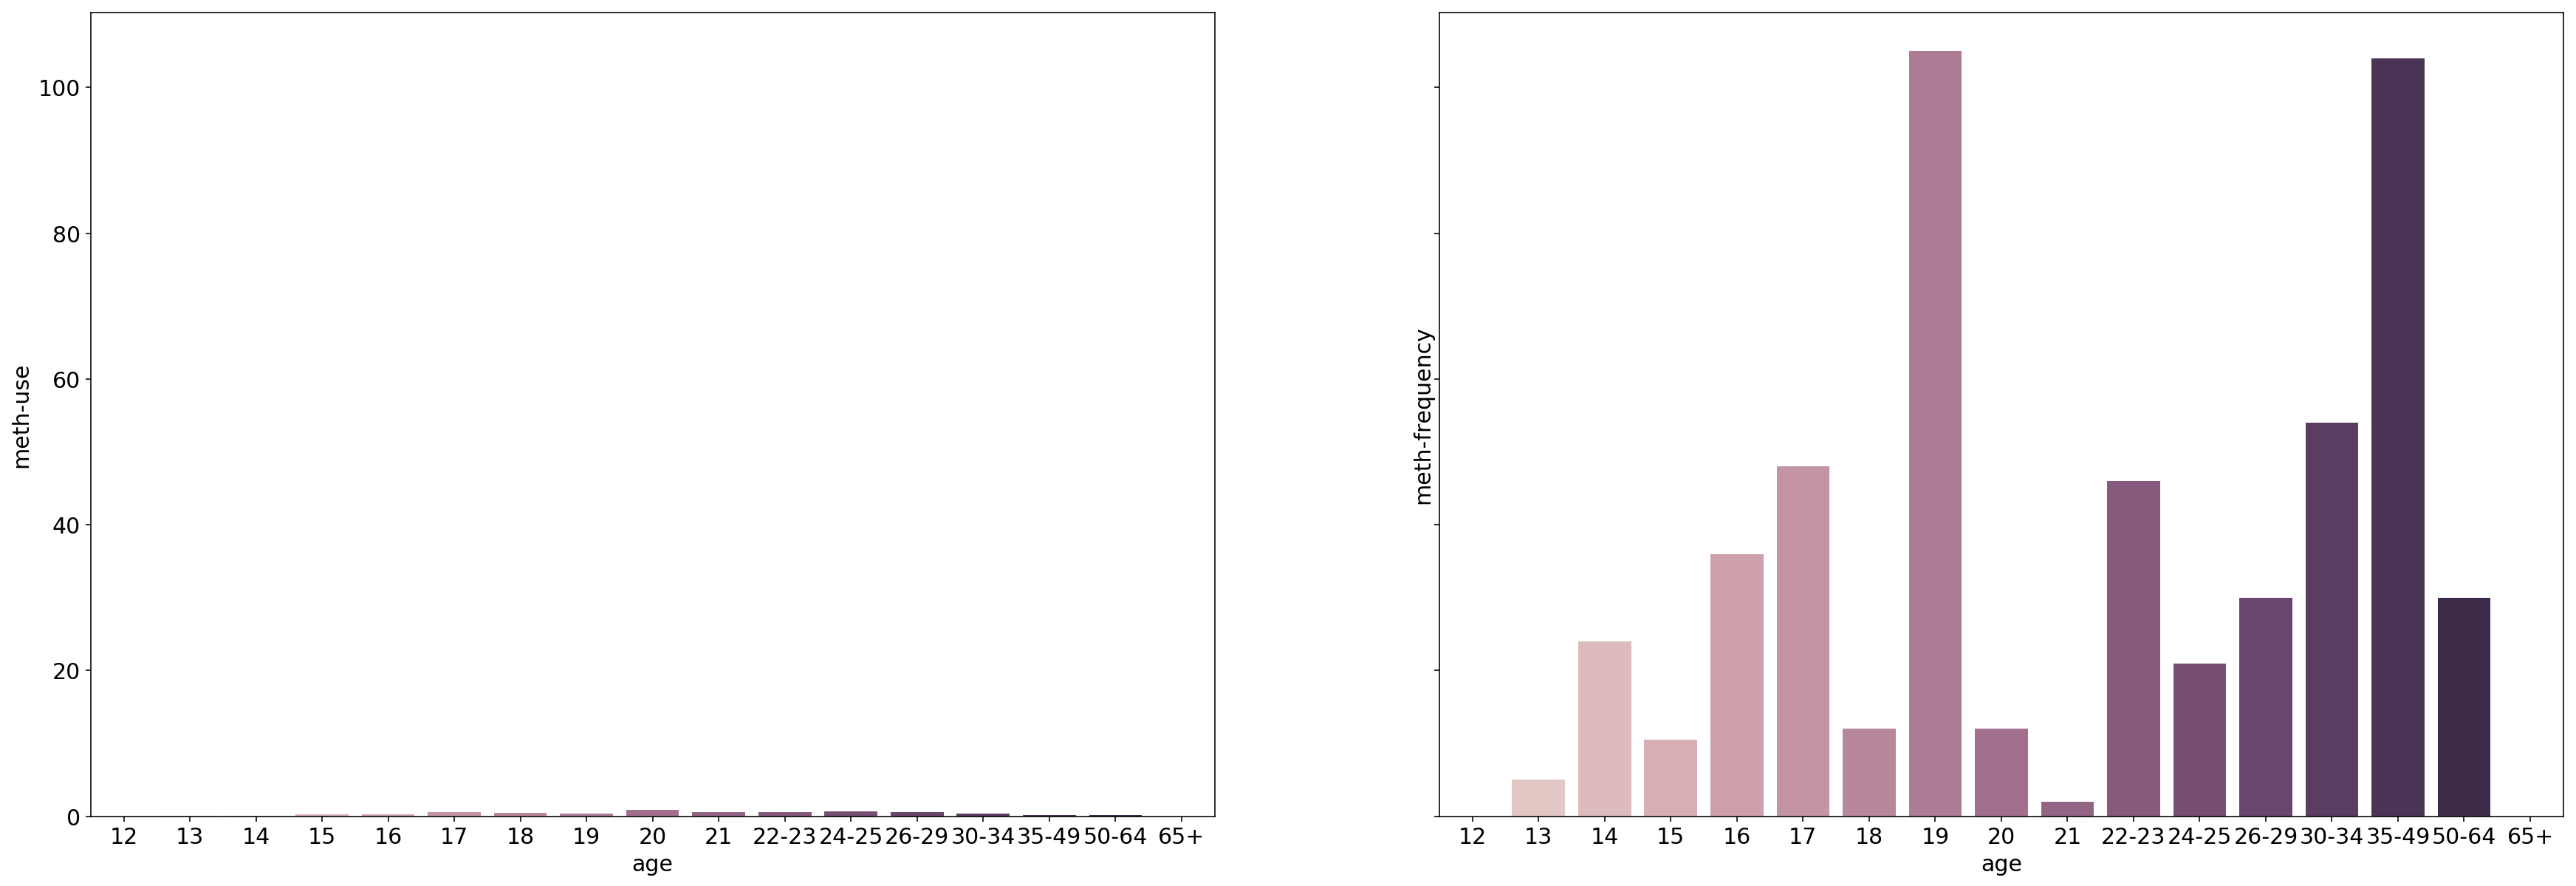

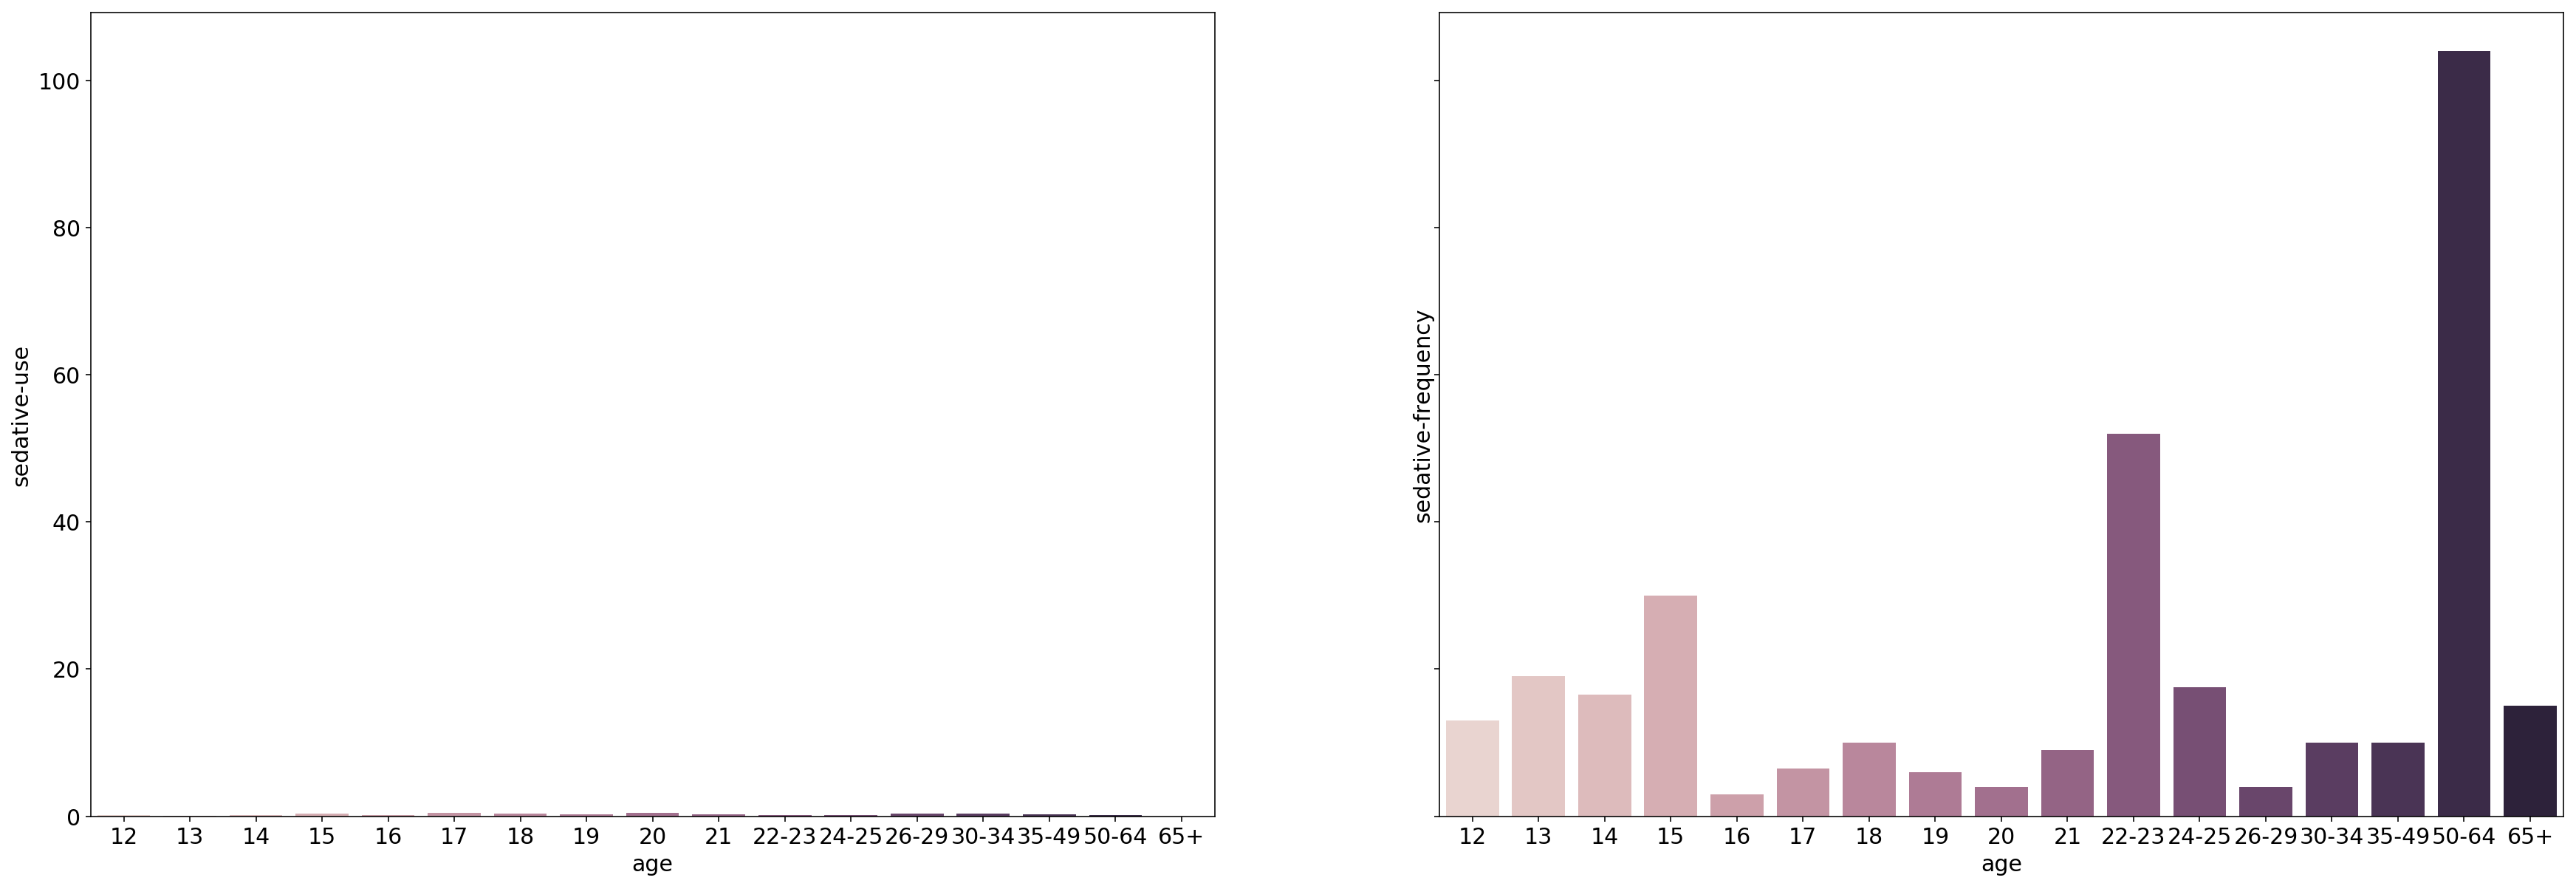

In [44]:
for seq in range(len(drug_use)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30, 10))
    sns.set_palette(sns.cubehelix_palette(17))
    sns.barplot(x='age', y=df_drug[drug_use[seq]],data=df_drug,ax=ax1)
    sns.barplot(x='age', y=df_drug[drug_frequency[seq]], data=df_drug,ax=ax2)

# Based on research: https://www.notodrugs.org.tw/drugfacts/lsd.html
# Depressant: alcohol, heroin,pain-releiver,oxycontin,sedative
# Stimulants: cocaine, crack (one kind of cocaine), stimulant, meth
# Cannabis: marijuana
# Hallucinogen
# Inhalant
# Anesthetics: tranquilizer

ANS:
Based on the given dataset and some research, as for drug_frequecy, marijuana and alcohol shows a strong positive correlation and they are the most commonly abused drugs, my guess is that some states of America treats marijuana as legal products. People tends to be easier to get marijuana and alcohol.Crack is the crystal form of cocaine, which normally comes in a powder form. Crack, the most potent form in which cocaine appears, is also the riskiest. Hence, there is a strong positive correlation between crack and cocaine.Cocaine and crack are stimulants, hence there is a strong correlation among them. Here is one exception, meth is stimulant but there is no correlation between in terms of frequecy. Inhhalant and hallucinogen also shows a strong positive correlation, I guess they have similar functions.
    
For drug_use, marijuana has a strong positive correlation with hallucinogen, pain-releiver,oxycontin,tranquilizer and stimulant. Because marijuana has medical benifits. Those drung with same functionality tends to have more positive correlation in terms of drug use.
Inhalant is a very special drug, no correlation between inhalant and the other drug listed in the dataset. People addicted to inhalant seems like will only chosse inhalant.

Then I add age as a parameter to analysis. The needs of drug tend to drop with people getting elder. I guess elder people have more meaningful things to handle than drug abusement. Their family and their life , the responsibility make them get rid of drug (Just a guess and hope)
    
    Alcohol, when teenages grown up to become adults, the more and more people will drink alcohal until mid of their 25th. Then the percentage of people drink alcohol gradually decreased. And alcohol frequency saturated at the 21 years old, my guessing it is more on social networks and family gathering which is around once per week (median).
    
    Marijuana, the percentage of marijuana use is increasing from 12 to around 20. The needs of marijuana dropped after 21 and the frequency acutally not varied very much.
    
    Cocaine, although the drug use and age trends still same. Less people at 50-64 abuse cocaine. But the frequency of cocaine is extremly high at 50-64 with respect to other age groups. And crack is the crystal form of cocaine, people with age of 35-64 abuse crack very frequently. I think once a person is addicted to Cocaine or Crack, the harm is perment.Reaserches tell us those people who are addicted to cocaine/crack would need more potent of cocaine/crack, that is why the frequency is extremly high. People tend to choose crack, I guess it is due to the price. Readings tell me that crack is cheaper with comparison to cocaine. 
    
    Heroin, the percentage of people from different age goup who abuse heroin is not significant.But the frequency is very terrible (High!) especially for people from age group 19 and 35-49. 
    
    "A vicious circle
    During the 1850s, opium addiction was a major problem in the United States. The “solution” was to provide opium addicts with a less potent and supposedly “non-addictive” substitute—morphine. Morphine addiction soon became a bigger problem than opium addiction.

    As with opium, the morphine problem was solved by another “non-addictive” substitute—heroin, which proved to be even more addictive than morphine. With the heroin problem came yet another “non-addictive” substitute—the drug now known as methadone. First developed in 1937 by German scientists searching for a surgical painkiller, it was exported to the US and given the trade name “Dolophine” in 1947. Renamed methadone, the drug was soon being widely used as a treatment for heroin addiction. Unfortunately, it proved to be even more addictive than heroin.

    By the late 1990s, the mortality rate of heroin addicts was estimated to be as high as twenty times greater than the rest of the population. <=Credit to https://www.drugfreeworld.org/drugfacts/heroin.html?noreload=1"

    Hallucinogen and inhalant are quite similar, younger teenagers and elders tend to abuse these two.
    "By survey, almost 50% of teens believe that taking prescription drugs is much safer than using illegal street drugs.<=https://www.drugfreeworld.org/drugfacts/painkillers.html?noreload=1" That is a potential reason why teenagers abuse pain-releiver, oxycontin,tranquilizer. 
    People at 65+ group abuse stimulants more.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

# Since alcohol and marijuana are two most commonly abused drugs. Hence, I am very interested in the relationship between how frequent people abuse alohol and people abuse marijuana in this sample data. 

DATA1:Median number of times a user in an age group used alcohol in the past 12 months

DATA2:Median number of times a user in an age group used marijuana in the past 12 months

In [45]:
#Use chi2
'''
H0: alcohol_frequency >= marijuana_frequency 
H1: alcohol_frequency < marijuana_frequency 
'''

'\nH0: alcohol_frequency >= marijuana_frequency \nH1: alcohol_frequency < marijuana_frequency \n'

In [46]:
# Code
df_hypo=df_drug[['alcohol-frequency','marijuana-frequency']].copy()

In [47]:
df_hypo

,alcohol-frequency,marijuana-frequency
0,3.0,4.0
1,6.0,15.0
2,5.0,24.0
3,6.0,25.0
4,10.0,30.0
5,13.0,36.0
6,24.0,52.0
7,36.0,60.0
8,48.0,60.0
9,52.0,52.0


In [48]:
alcohol_mean=df_hypo['alcohol-frequency'].mean()

In [49]:
marijuana_mean=df_hypo['marijuana-frequency'].mean()

In [50]:
print("Alcohol mean: %f "%alcohol_mean)
print("Marijuana mean: %f"%marijuana_mean)
print("Mean difference: %f"%(alcohol_mean-marijuana_mean))

Alcohol mean: 33.352941 
Marijuana mean: 42.941176
Mean difference: -9.588235


In [51]:
stats.ttest_ind(df_hypo['alcohol-frequency'],df_hypo['marijuana-frequency'])

Ttest_indResult(statistic=-1.4050418979783086, pvalue=0.169642784061864)

In [52]:
'''
p>0.05, we cannot reject the null hypothesis
'''

'\np>0.05, we cannot reject the null hypothesis\n'

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [53]:
sat_exclude_rate=df_sat[['State','Verbal','Math']].copy()

In [54]:
sns.set_palette("Blues_r")

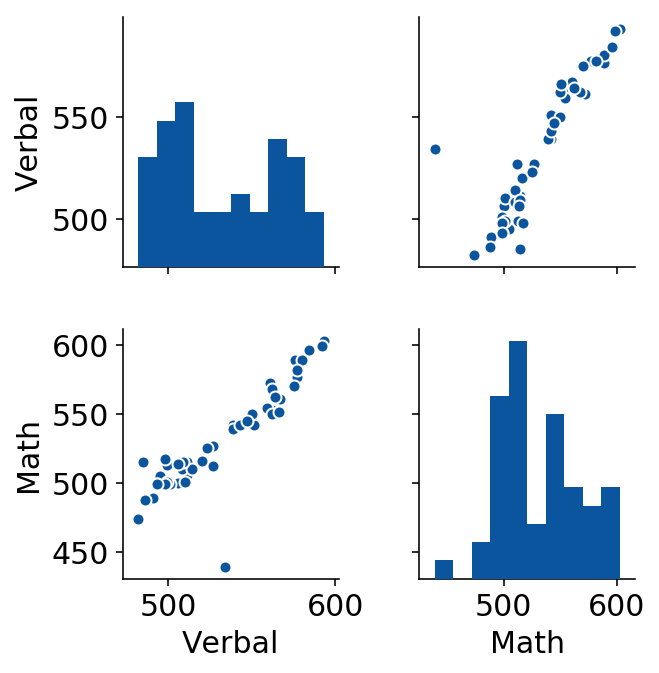

In [55]:
sns.pairplot(sat_exclude_rate)

# Based on the plots , there is one outlier whose verbal between[500,600] and math below 450 

In [56]:
sat_exclude_rate.dtypes

State     object
Verbal     int64
Math       int64
dtype: object

In [57]:
outlier=sat_exclude_rate[(sat_exclude_rate['Verbal']>500)&(sat_exclude_rate['Verbal']<600)&(sat_exclude_rate['Math']<450)]

In [58]:
outlier

,State,Verbal,Math
27,OH,534,439


In [59]:
sat_exclude_rate[(sat_exclude_rate['Verbal']>500)&(sat_exclude_rate['Verbal']<600)&(sat_exclude_rate['Math']<450)].index

Int64Index([27], dtype='int64')

In [60]:
sat_exclude_rate_no_outlier=sat_exclude_rate.drop(outlier.index).reset_index(drop=True)

In [61]:
sat_exclude_rate.describe()

,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


In [62]:
sat_exclude_rate_no_outlier.describe()

,Verbal,Math
count,51.000000,51.000000
mean,531.980392,533.313725
std,33.565751,33.890111
min,482.000000,474.000000
25%,501.000000,505.500000
50%,526.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


In [63]:
sat_exclude_rate.median()

Verbal    526.5
Math      521.0
dtype: float64

In [64]:
sat_exclude_rate_no_outlier.median()

Verbal    526.0
Math      525.0
dtype: float64

In [65]:
outlier

,State,Verbal,Math
27,OH,534,439


In [66]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=1)
k_means.fit(sat_exclude_rate[['Verbal','Math']])
centroids=k_means.cluster_centers_
centroids

array([[532.01923077, 531.5       ]])

# Before and After
# Verbal: Mean decrease, STD increase, Median decrease
# Math: Mean increase, STD decrease, Median increase
# Due to the outlier location and how it contribute to the formation of each statistic. How far it is away from the centroid and which direction (vectorwise,euclidean distance)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Pearson product moment correlation
The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

For example, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.

Spearman rank-order correlation
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.
credit to https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

# If we have two columns data col1 and col2
# Firstly, we rank individual data in its corresponding column with either ascending or descending manner. We will have two new columns which contain the rankings  of the original two columns.

# Next, calculate the difference between ranks to get difference column.

# Thirdly, square the difference and add them together to get the summation of difference square.

# Apply formula 1-6*SUM(SQRE(D))/(n*(SQRE(n)-1)

In [67]:
sat_exclude_rate[['Verbal','Math']].corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [68]:
stats.spearmanr(sat_exclude_rate['Verbal'], sat_exclude_rate['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [69]:
sat_rate_percentile=df_sat[['State','Rate']].copy()

In [70]:
sat_rate_percentile['Percentile']=sat_rate_percentile['Rate'].apply(lambda x: stats.percentileofscore(sat_rate_percentile['Rate'],x))

In [71]:
sat_rate_percentile.head()

,State,Rate,Percentile
0,CT,82,100.000000
1,NJ,81,98.076923
2,MA,79,96.153846
3,NY,77,94.230769
4,NH,72,92.307692


In [72]:
sat_rate_percentile[sat_rate_percentile['State']=='CA']

,State,Rate,Percentile
23,CA,51,56.730769


In [73]:
sat_rate_percentile['Rank']=(sat_rate_percentile['Rate'].max()+1)-sat_rate_percentile['Rate']

In [74]:
sat_rate_percentile.corr()

,Rate,Percentile,Rank
Rate,1.000000,0.976273,-1.000000
Percentile,0.976273,1.000000,-0.976273
Rank,-1.000000,-0.976273,1.000000


# A strong negative correlation, because of roundings and decimal points they are not exactly correlated

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

# Because outlier is an extrem case which is not statistically belong to this group, it will skew the percentile. Hence, based on the percentile, we can trace back to find outliers.

In [75]:
alcohol_use=df_drug['alcohol-use'].copy()

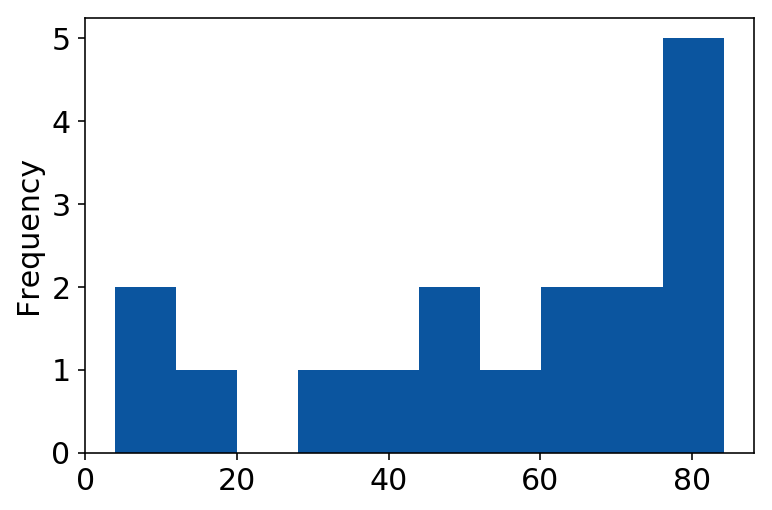

In [76]:
alcohol_use.plot(kind='hist')

Text(0,0.5,'Probability Density')

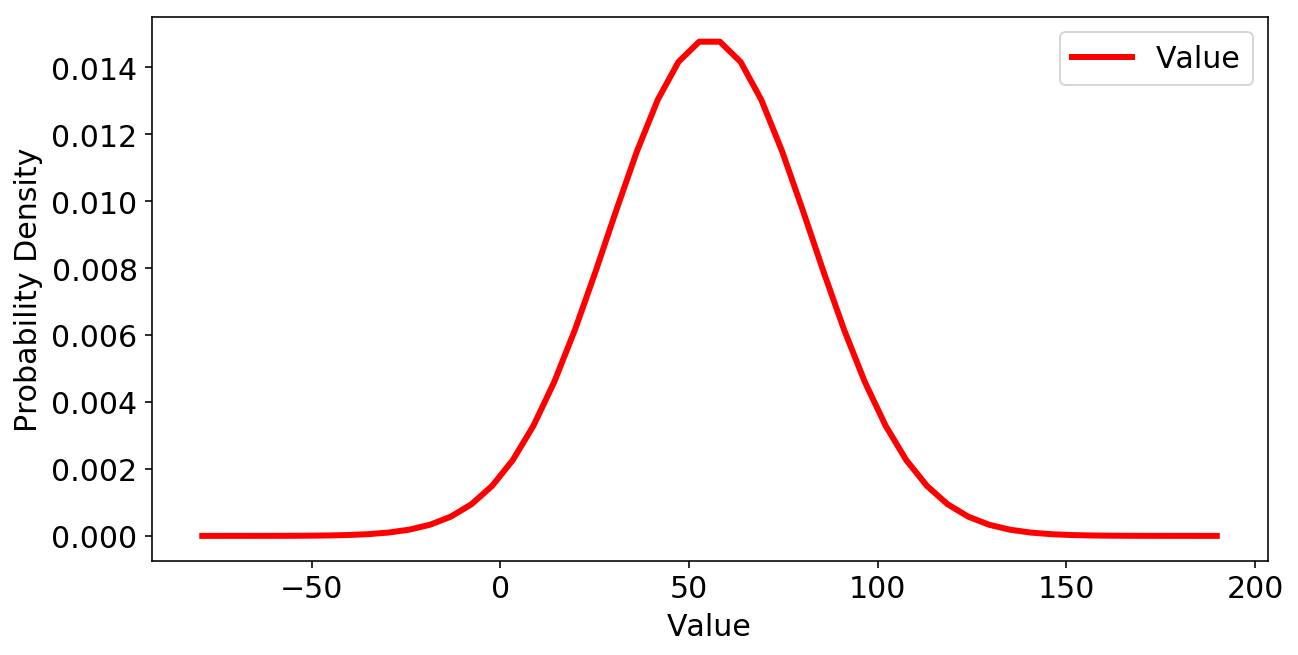

In [77]:
alcohol_mean = alcohol_use.mean()
alcohol_std = alcohol_use.std()

xpoints = np.linspace(alcohol_mean - 5*alcohol_std, alcohol_mean + 5*alcohol_std)
ypoints = stats.norm.pdf(xpoints, alcohol_mean, alcohol_std)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xpoints, ypoints, linewidth=3, color='red')
ax.legend(['Value'])
plt.xlabel('Value')
plt.ylabel('Probability Density')

In [78]:
alcohol_use_percentile=alcohol_use.apply(lambda x: stats.percentileofscore(alcohol_use,x))

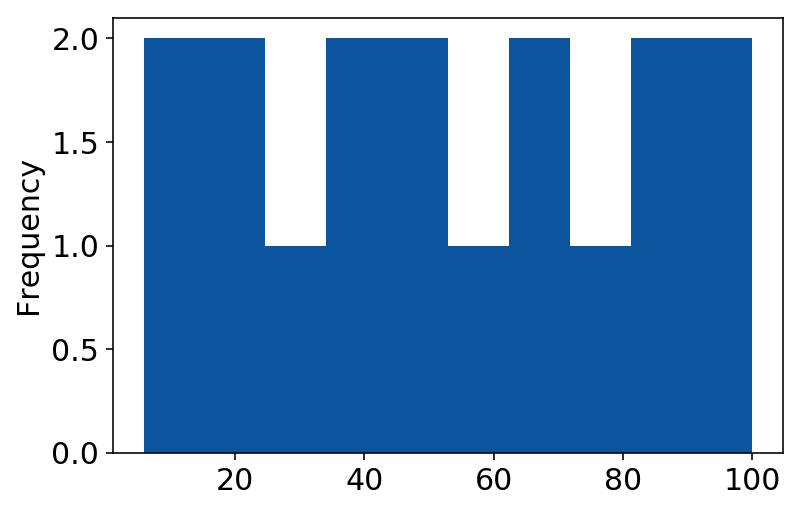

In [79]:
alcohol_use_percentile.plot(kind='hist')

Text(0,0.5,'Probability Density')

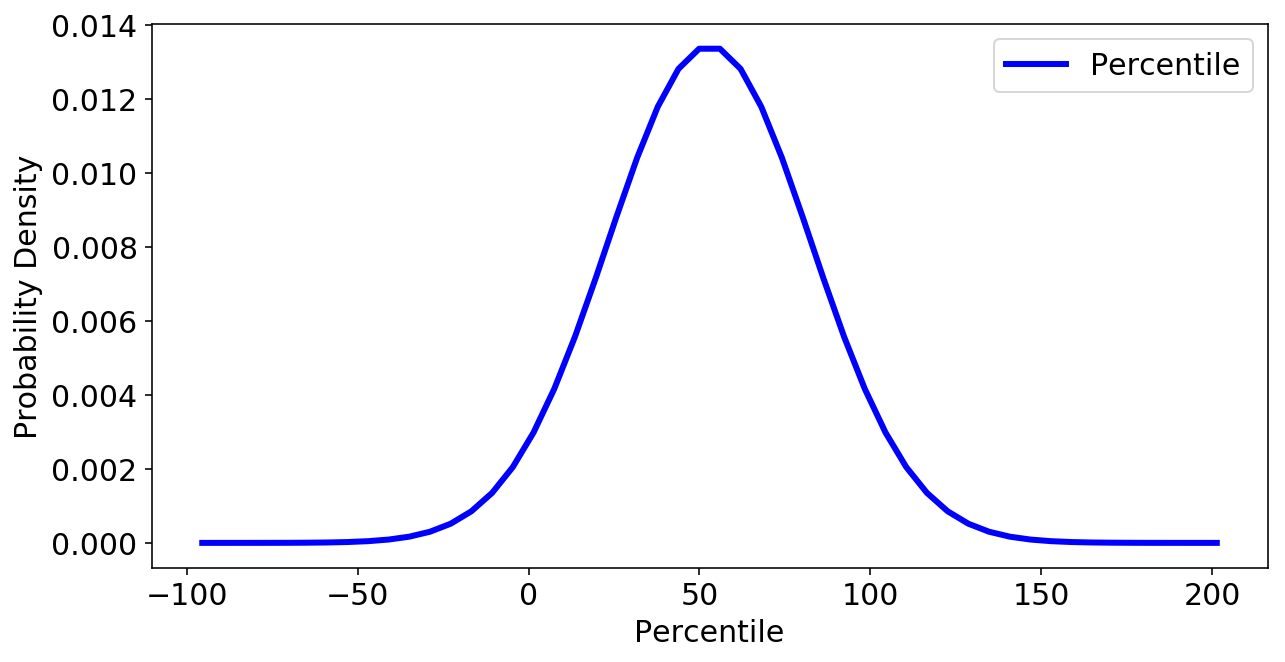

In [80]:
alcohol_use_percentile_mean = alcohol_use_percentile.mean()
alcohol_use_percentile_std = alcohol_use_percentile.std()

xpoints = np.linspace(alcohol_use_percentile_mean - 5*alcohol_use_percentile_std, alcohol_use_percentile_mean + 5*alcohol_use_percentile_std)
ypoints = stats.norm.pdf(xpoints, alcohol_use_percentile_mean, alcohol_use_percentile_std)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xpoints, ypoints, linewidth=3, color='blue')
ax.legend(['Percentile'])
plt.xlabel('Percentile')
plt.ylabel('Probability Density')

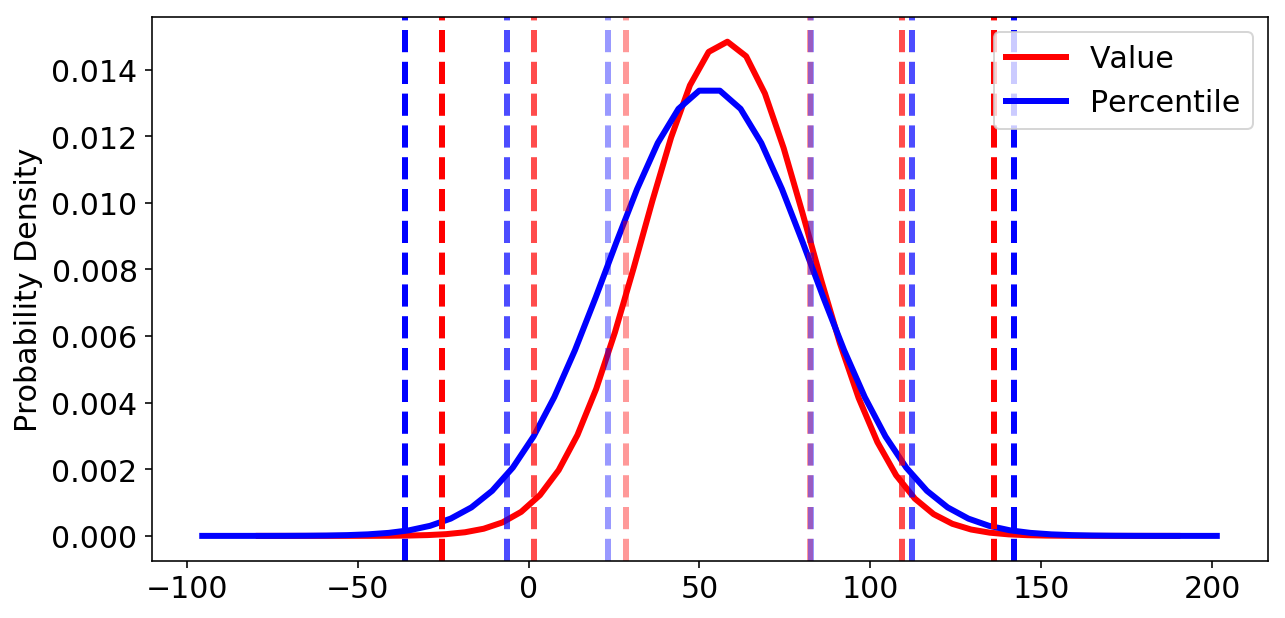

In [81]:
fig, ax = plt.subplots(figsize=(10,5))

xpoints_1 = np.linspace(alcohol_mean - 5*alcohol_std, alcohol_mean + 5*alcohol_std)
ypoints_1 = stats.norm.pdf(xpoints, alcohol_mean, alcohol_std)

xpoints_2 = np.linspace(alcohol_use_percentile_mean - 5*alcohol_use_percentile_std, alcohol_use_percentile_mean + 5*alcohol_use_percentile_std)
ypoints_2 = stats.norm.pdf(xpoints, alcohol_use_percentile_mean, alcohol_use_percentile_std)

ax.plot(xpoints_1, ypoints_1, linewidth=3, color='red')
ax.plot(xpoints_2, ypoints_2, linewidth=3, color='blue')
ax.legend(['Value','Percentile'])
plt.ylabel('Probability Density')

ax.axvline(alcohol_mean-alcohol_std, ls='dashed', lw=3, color='r', alpha=0.4)
ax.axvline(alcohol_mean+alcohol_std, ls='dashed', lw=3, color='r', alpha=0.4)
ax.axvline(alcohol_use_percentile_mean-alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=0.4)
ax.axvline(alcohol_use_percentile_mean+alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=0.4)

ax.axvline(alcohol_mean-2*alcohol_std, ls='dashed', lw=3, color='r', alpha=0.7)
ax.axvline(alcohol_mean+2*alcohol_std, ls='dashed', lw=3, color='r', alpha=0.7)
ax.axvline(alcohol_use_percentile_mean-2*alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=0.7)
ax.axvline(alcohol_use_percentile_mean+2*alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=0.7)

ax.axvline(alcohol_mean-3*alcohol_std, ls='dashed', lw=3, color='r', alpha=1)
ax.axvline(alcohol_mean+3*alcohol_std, ls='dashed', lw=3, color='r', alpha=1)
ax.axvline(alcohol_use_percentile_mean-3*alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=1)
ax.axvline(alcohol_use_percentile_mean+3*alcohol_use_percentile_std, ls='dashed', lw=3, color='b', alpha=1)